In [1]:
import glob
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os




def make_result_dicts(result_list):
    result_dict = {}
    for list in result_list:
        result_csv = glob.glob(os.path.join(list, '*'))
        emb_size = list.split('\\')[-1]

        csv_list = []
        for csv in result_csv:
            df=pd.read_csv(csv)
            csv_name = csv.split('\\')[-1].split('.')[0].split('_')[1:-1]
            csv_name = '_'.join(csv_name)

            df["emb_type"]=csv_name
            df["emb_size"]=emb_size

            csv_list.append(df)
            result_dict[emb_size] = csv_list
    return result_dict

lgm_results = glob.glob(os.path.join('results_lgm/', '*'))
svm_results = glob.glob(os.path.join('results_svm/', '*'))
lr_results = glob.glob(os.path.join('results_lr/', '*'))
knn_results = glob.glob(os.path.join('results_knn/', '*'))

lgm_dict = make_result_dicts(lgm_results)
svm_dict = make_result_dicts(svm_results)
lr_dict = make_result_dicts(lr_results)
knn_dict = make_result_dicts(knn_results)


In [2]:

def extract_std(s):
    parts = s.strip('()').split(', ')
    return float(parts[1])

def clean_metric(s):
    return s.strip('()').split(', ')[0]

def clean_df(df):
    metrics = ['AUC', 'Accuracy', 'f1', 'Recall', 'Precision', 'Average Precision', 'Sensitivity', 'Specificity', 'MCC']
    embedder_name = df['emb_type'][0]
    embedder_size = df['emb_size'][0]
    df=df.copy()

    for metric in metrics:
        # Extract standard deviation and store in a new column with '_st' suffix
        df[f"{metric}_st"] = df[metric].apply(extract_std).apply(pd.to_numeric, errors='coerce').round(4)
        # Clean the main metric and overwrite the original column
        df[metric] = df[metric].apply(clean_metric).apply(pd.to_numeric, errors='coerce').round(3)


    # Select columns for metric_df and st_df
    metric_names = ["dataset_name", "model"] + metrics
    st_names = ["dataset_name", "model"] + [f"{metric}_st" for metric in metrics]

    metric_df = df[metric_names]
    st_df = df[st_names]
    return metric_df, st_df, embedder_name, embedder_size

In [3]:
def make_heatmap(dataset1,dataset2,model_name="model",embedder_name="embedder",embedder_size="embedder_size"):

    if model_name!="model":
        model_name= dataset1.iloc[0]['model']

    y_labels1 = dataset1.iloc[:, 0]
    y_labels2 = dataset2.iloc[:, 0]

    dataset1 = dataset1.iloc[:, 2:]
    dataset2 = dataset2.iloc[:, 2:]

    fig, axes = plt.subplots(1, 2, figsize=(16,6))

    sns.heatmap(dataset1, cmap="Blues", annot=True, linewidths=.5, yticklabels=y_labels1, ax=axes[0],fmt=".3f")
    sns.heatmap(dataset2, cmap="Greens", annot=True, linewidths=.5, yticklabels=y_labels2, ax=axes[1],fmt=".3f")

    axes[0].set_title(f"Heatmap for {embedder_name} {model_name} with size {embedder_size} metric results")
    axes[1].set_title(f"Heatmap for {embedder_name} {model_name} with size {embedder_size} standard deviation results")

    plt.tight_layout()
    plt.show()

In [4]:
def plot_results(result_dict,embedding_size):
    key = embedding_size
    print(f"\n Results for embeddings with size {key} \n\n")

    for df in result_dict[key]:
        metric_df, st_df,embedder_name,embedder_size = clean_df(df)
        make_heatmap(metric_df, st_df,embedder_name=embedder_name,embedder_size=embedder_size)


In [6]:
print(lr_dict.keys())

dict_keys(['200_complete'])



 Results for embeddings with size 200_complete 




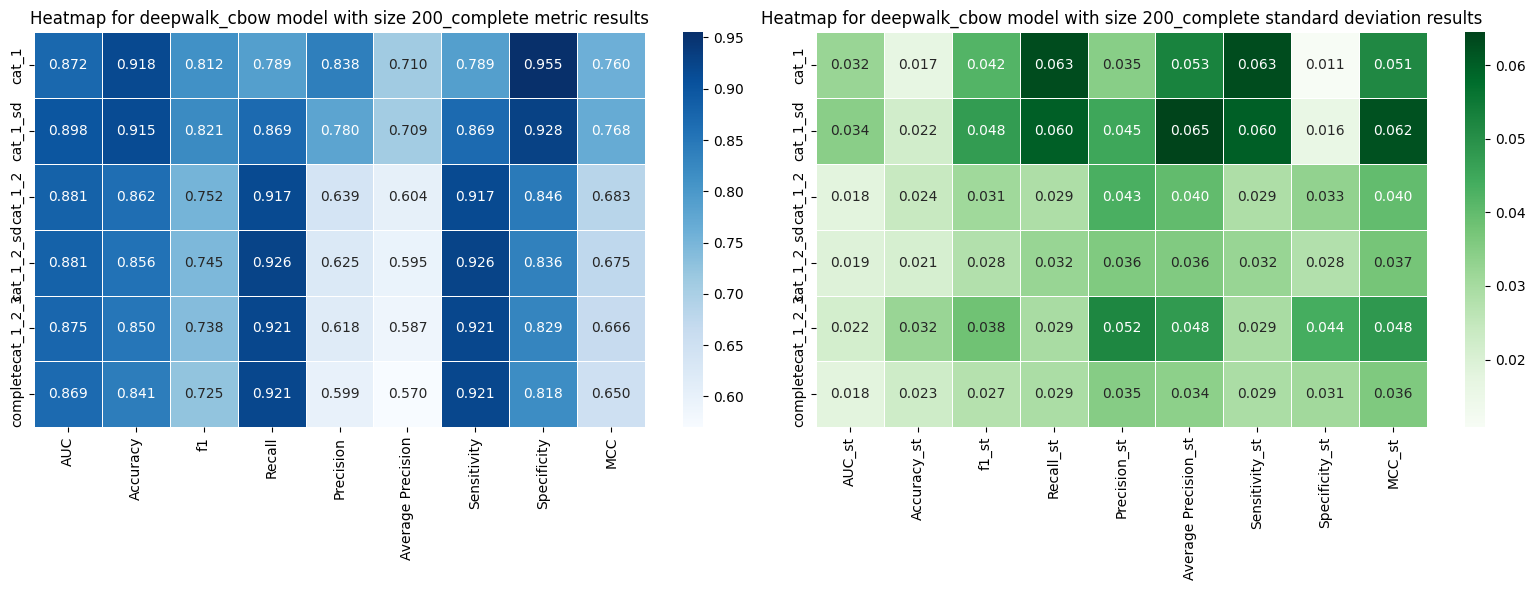

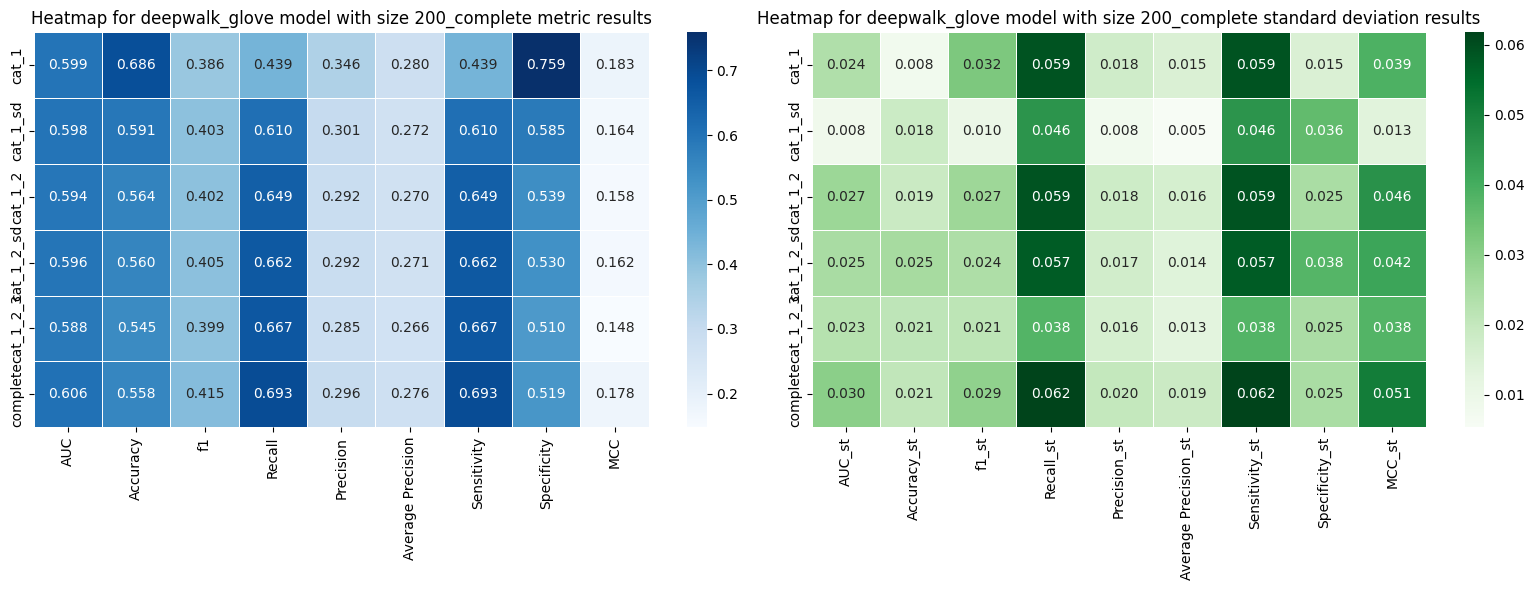

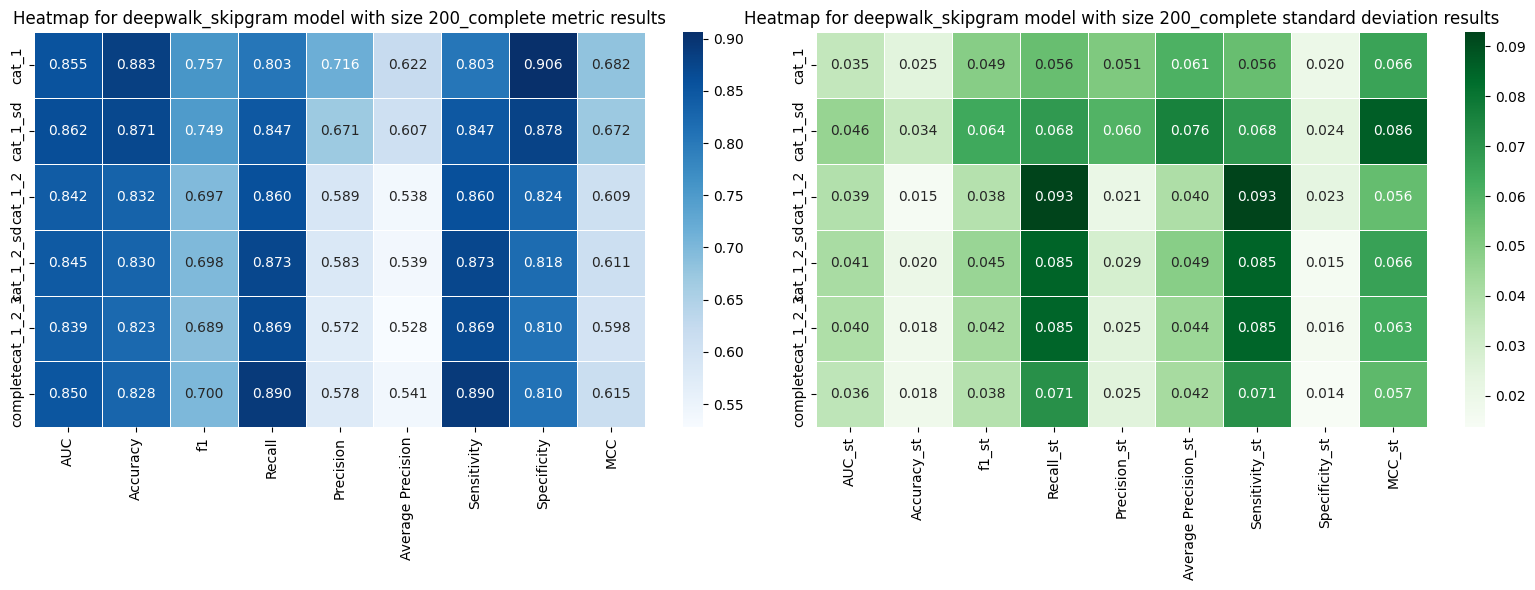

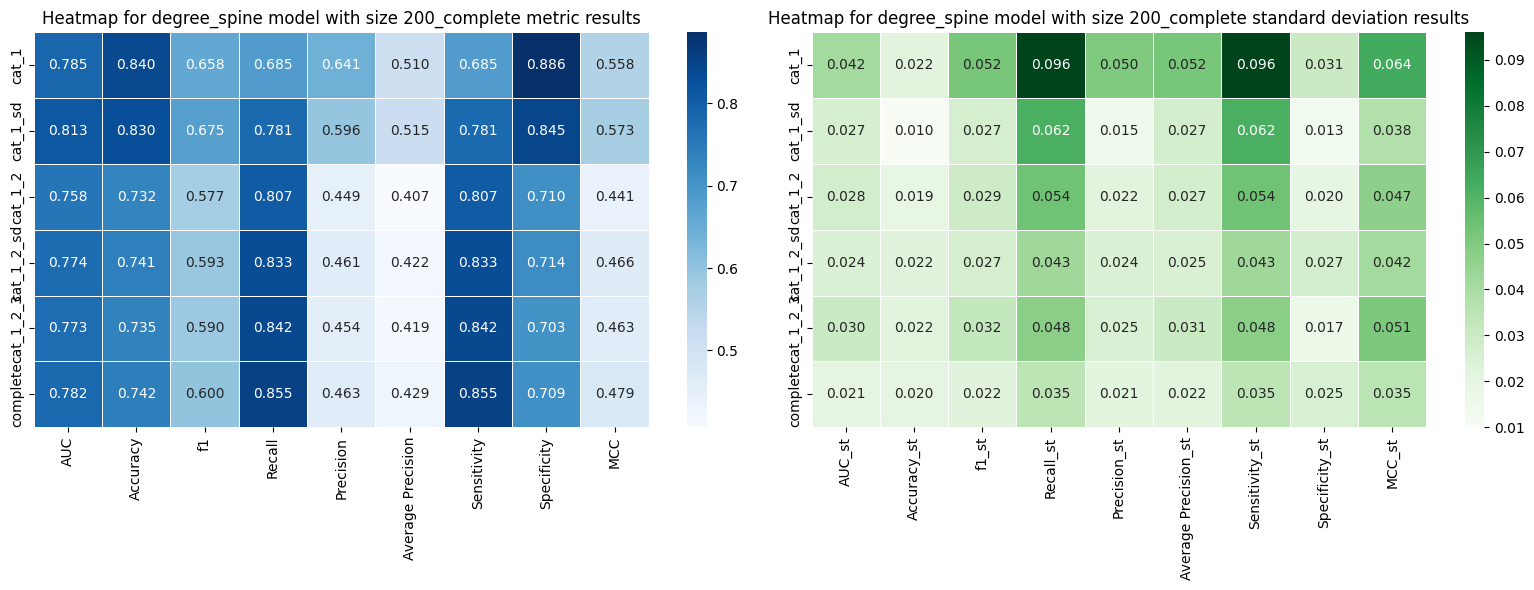

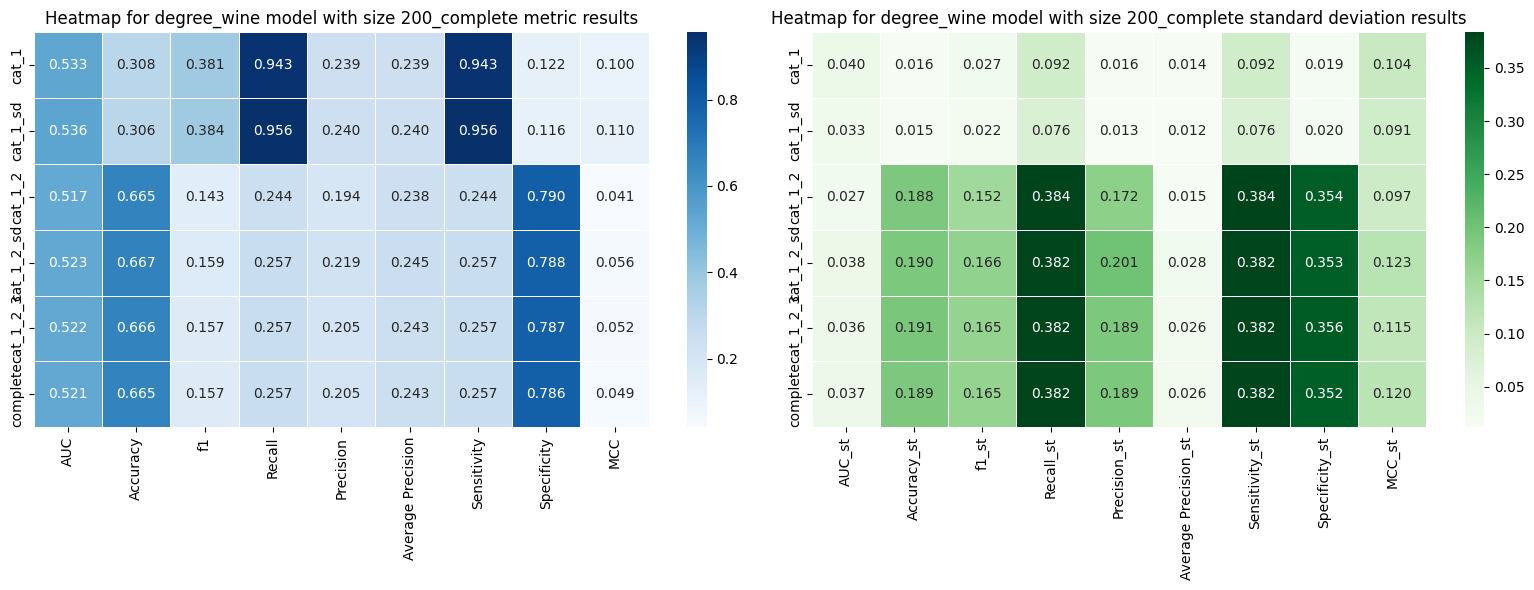

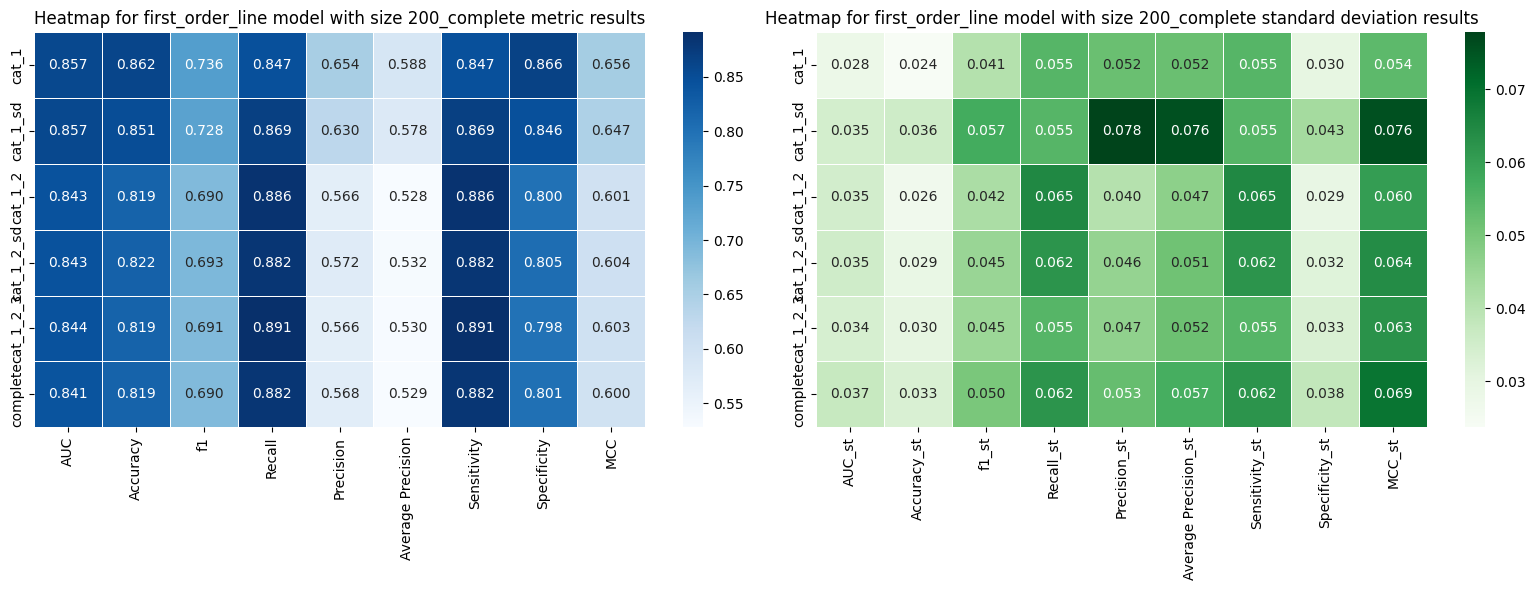

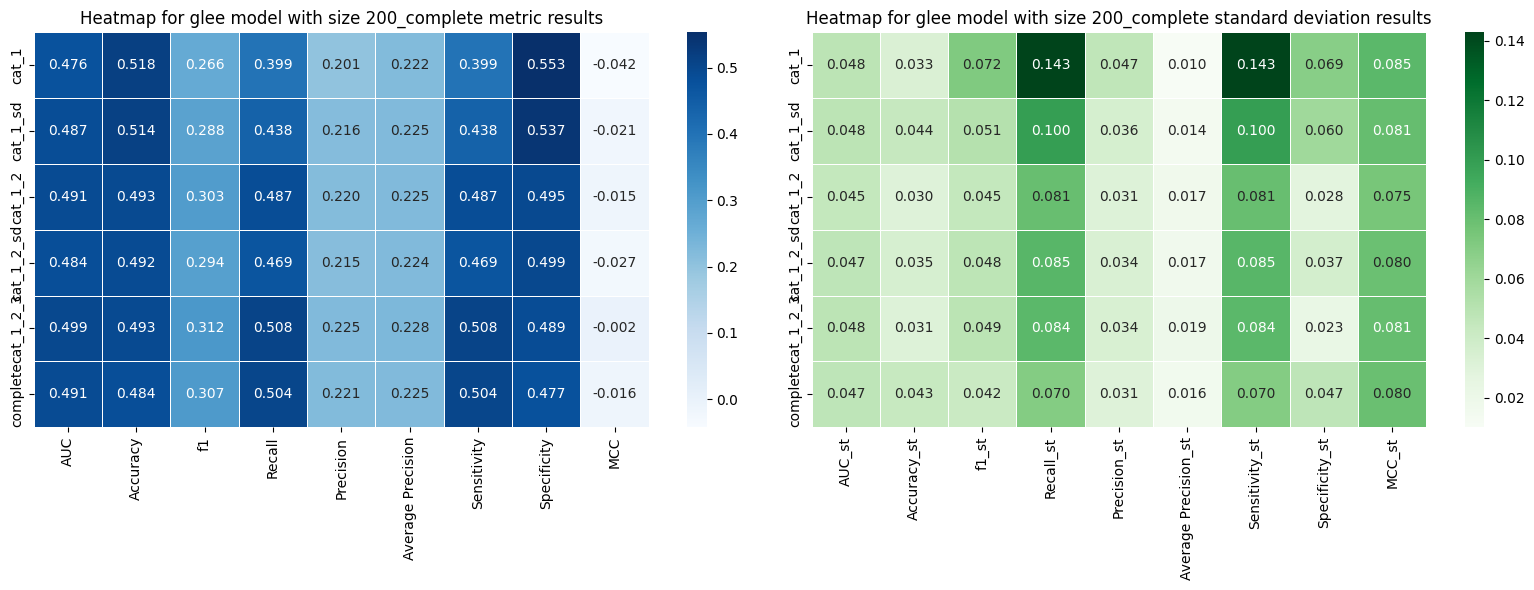

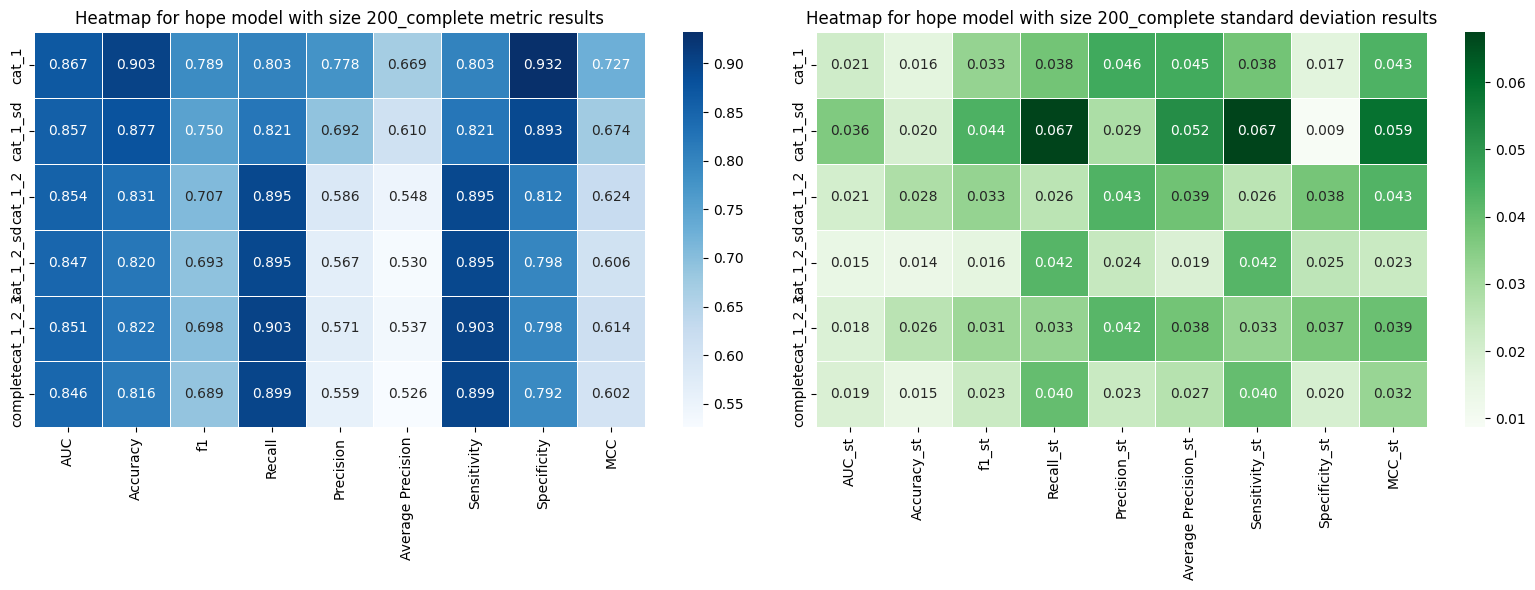

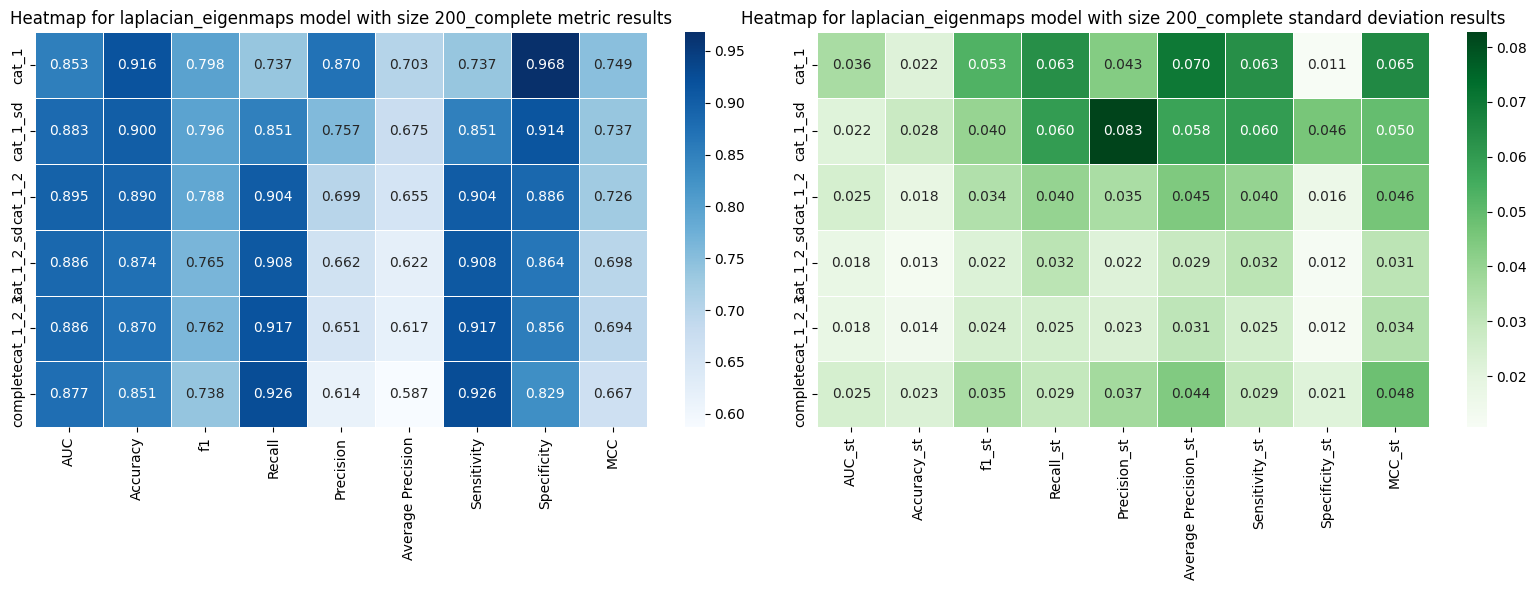

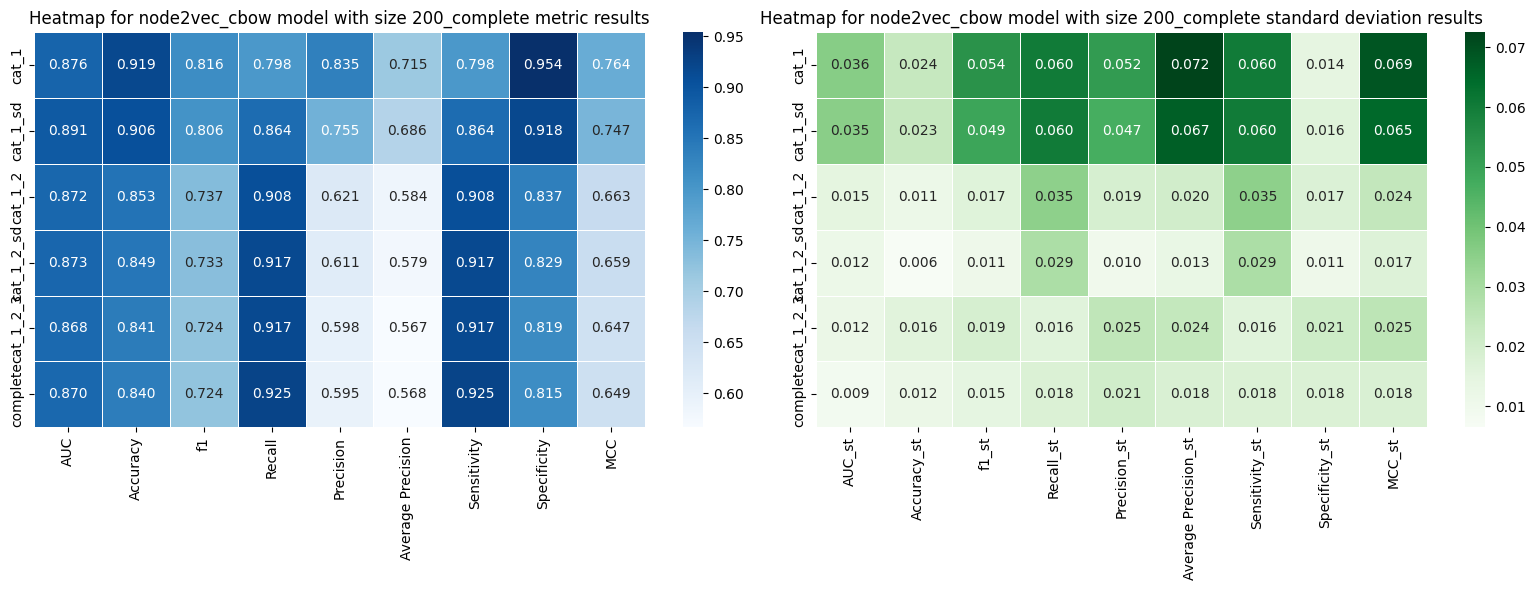

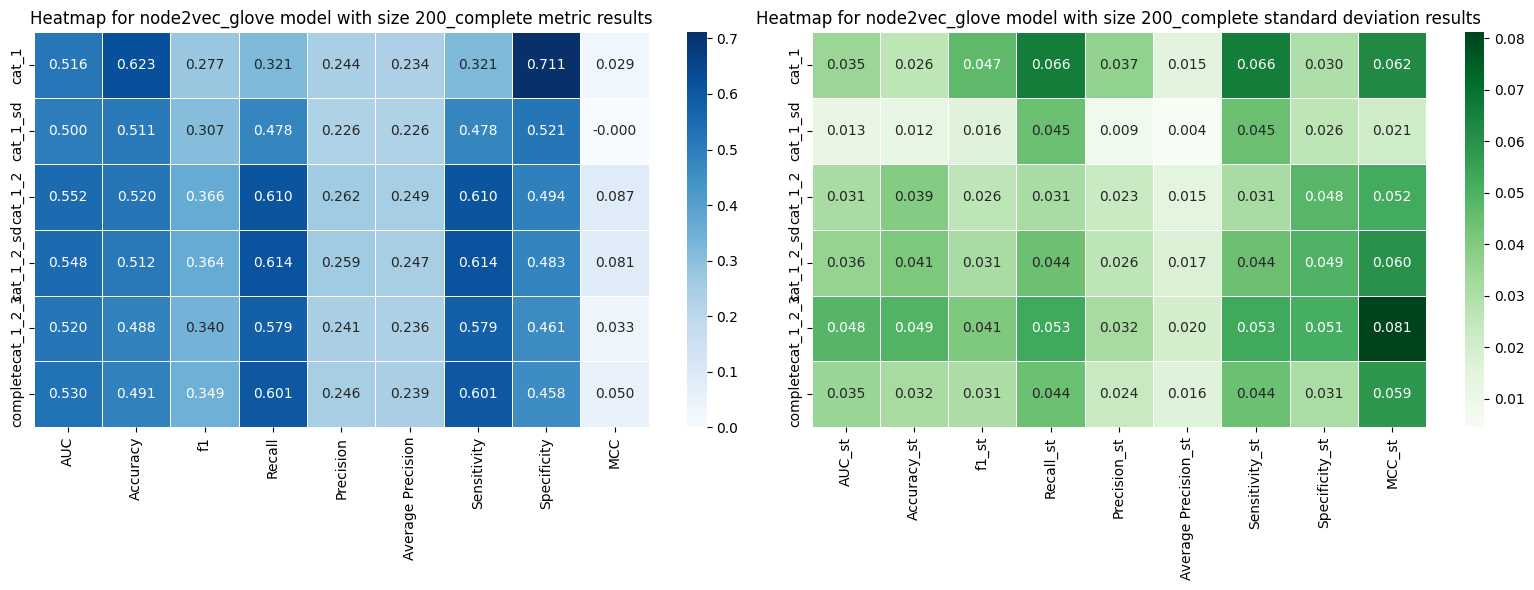

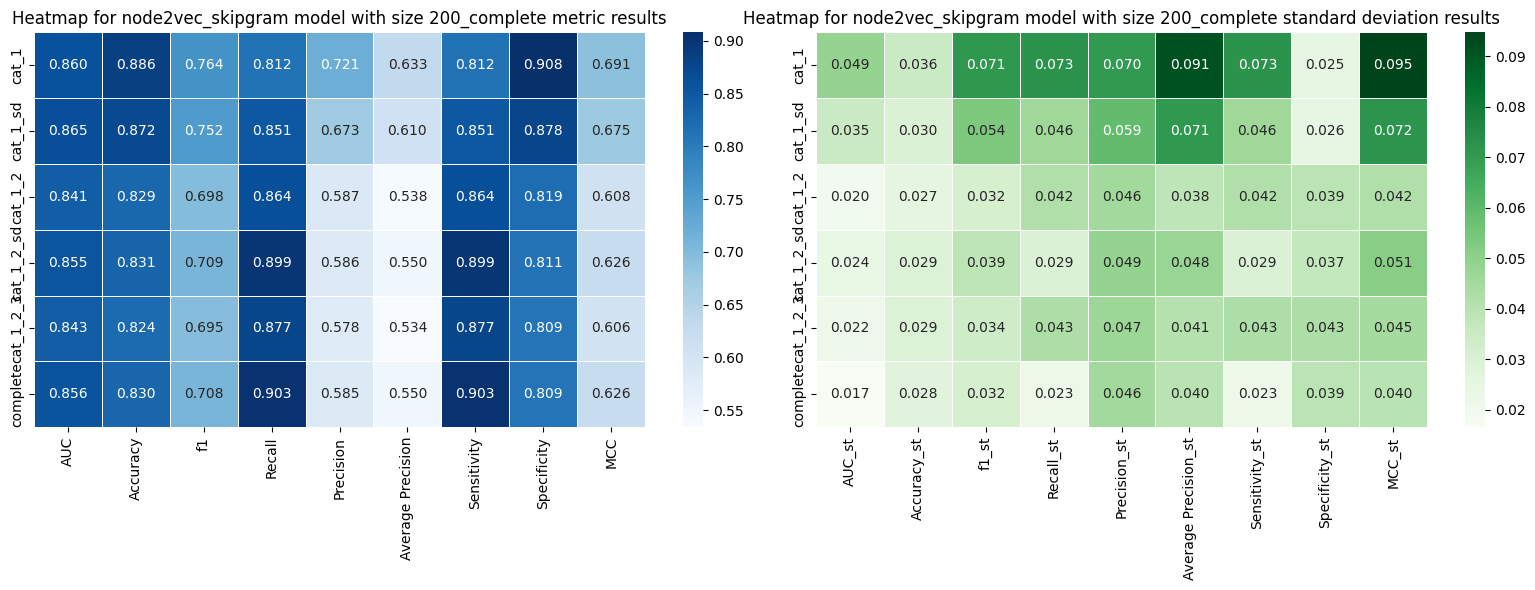

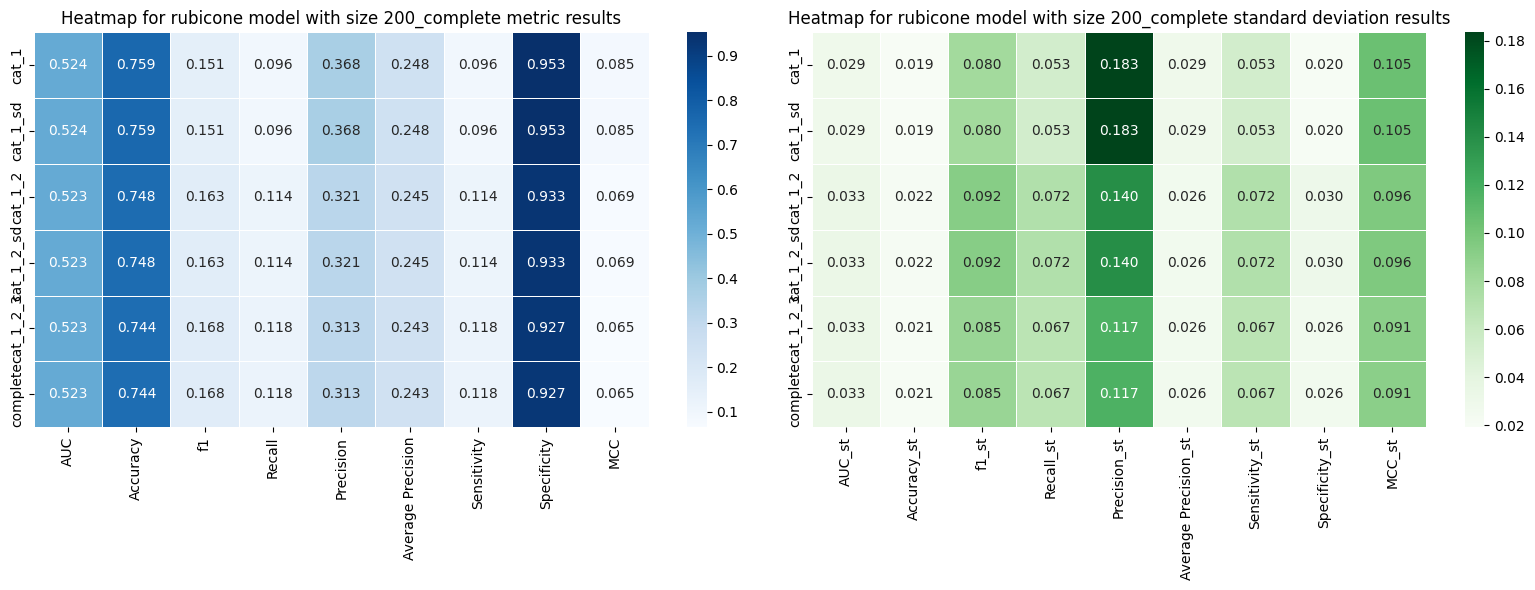

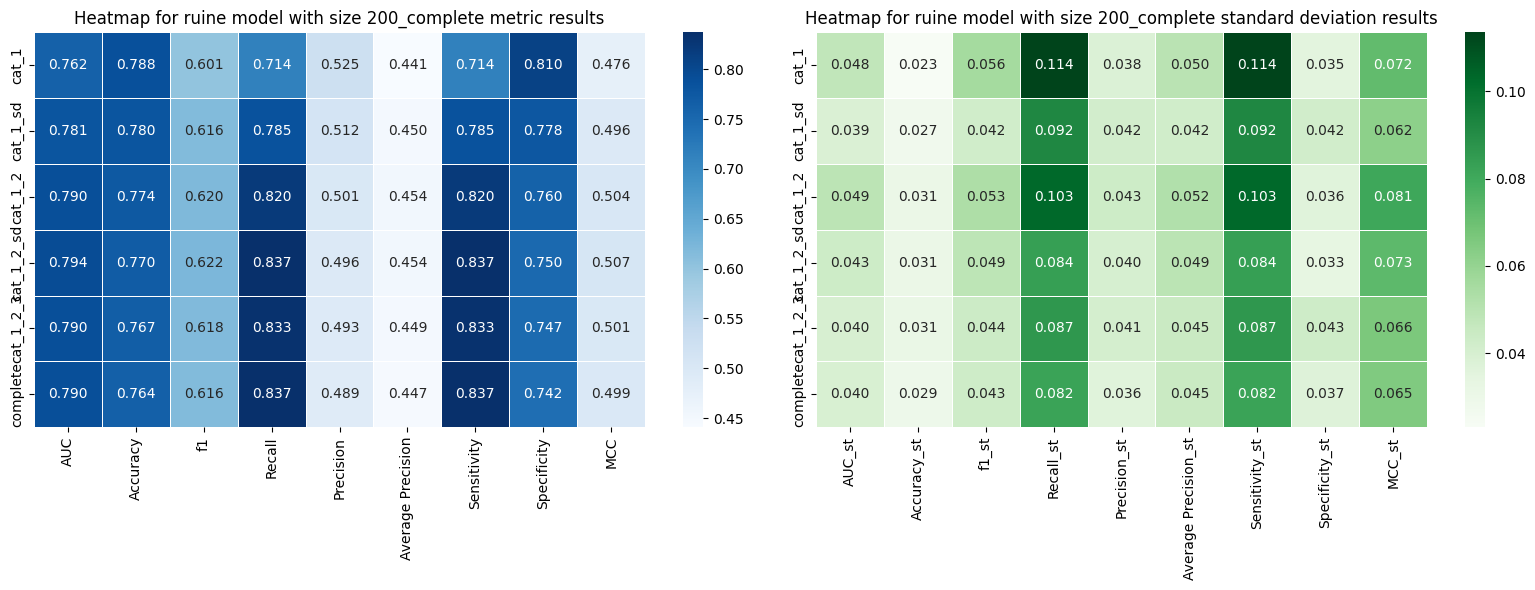

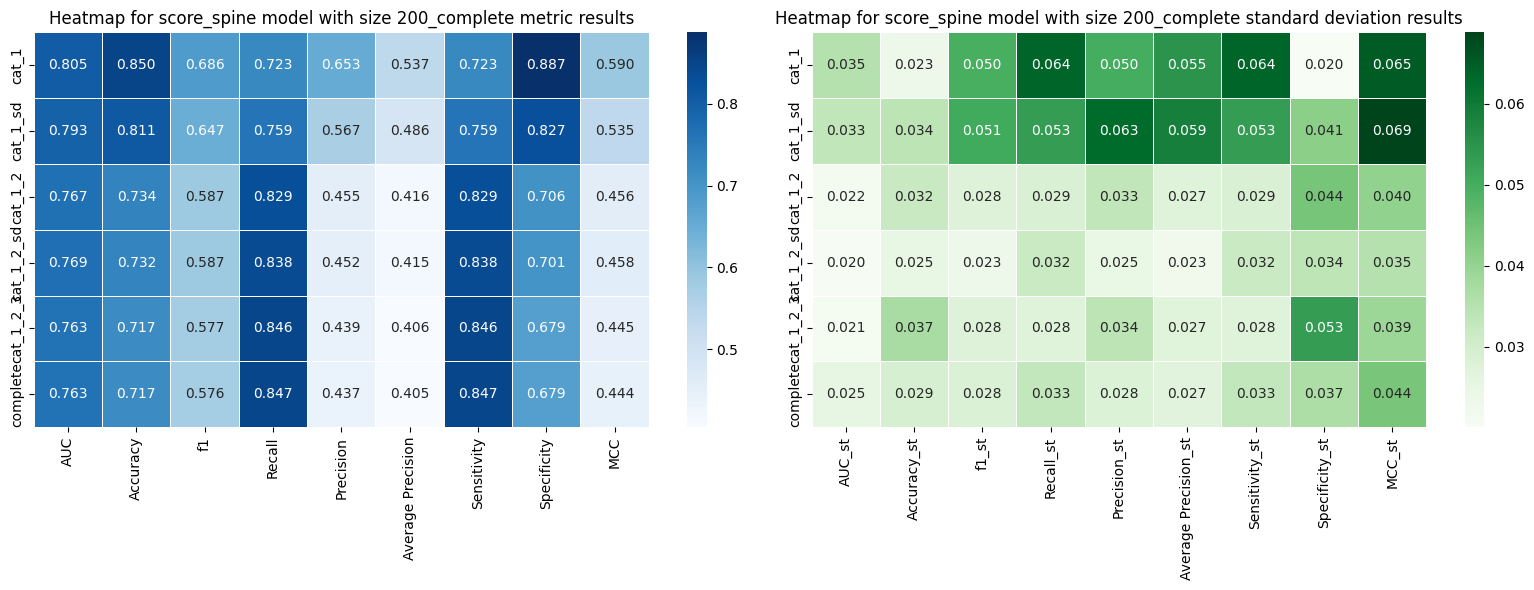

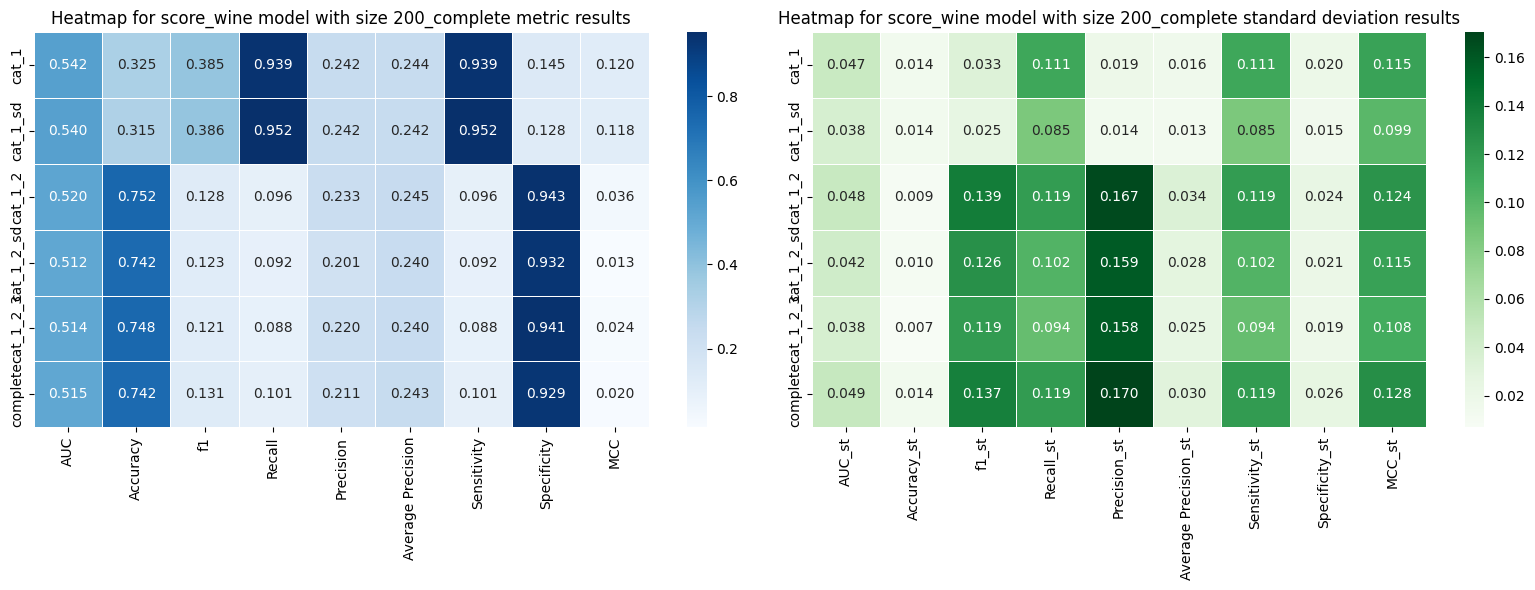

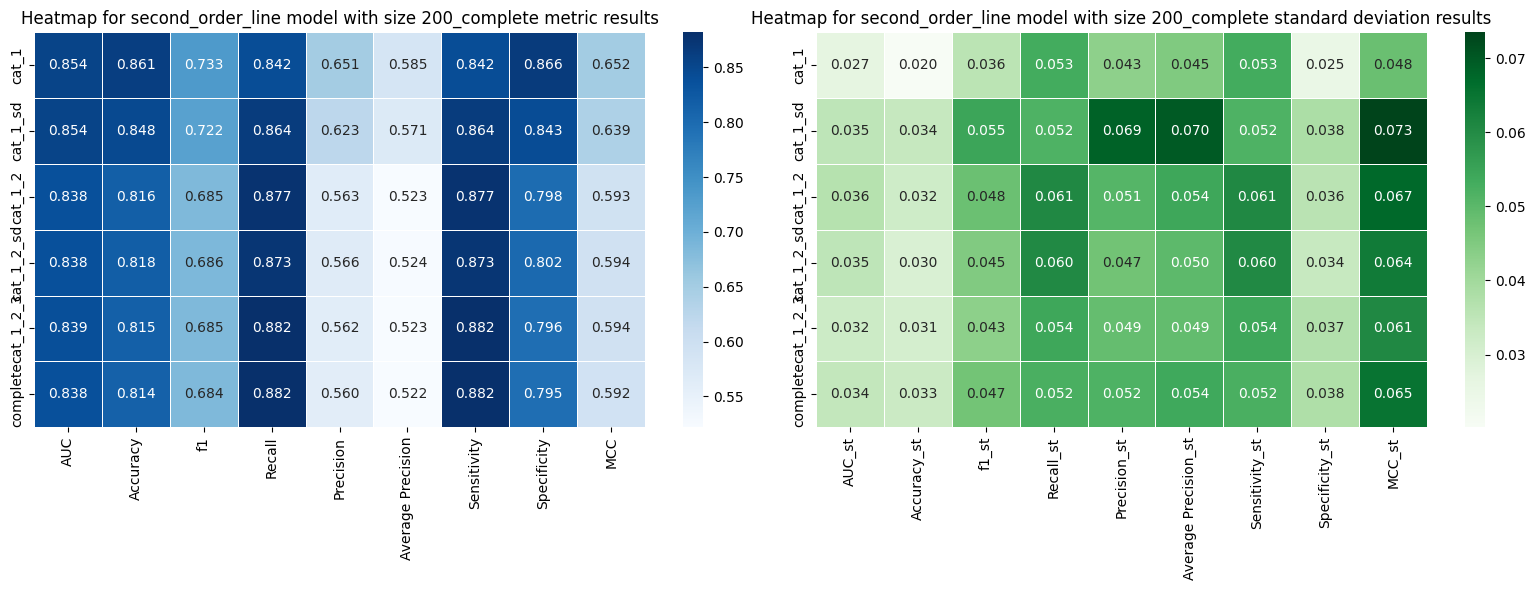

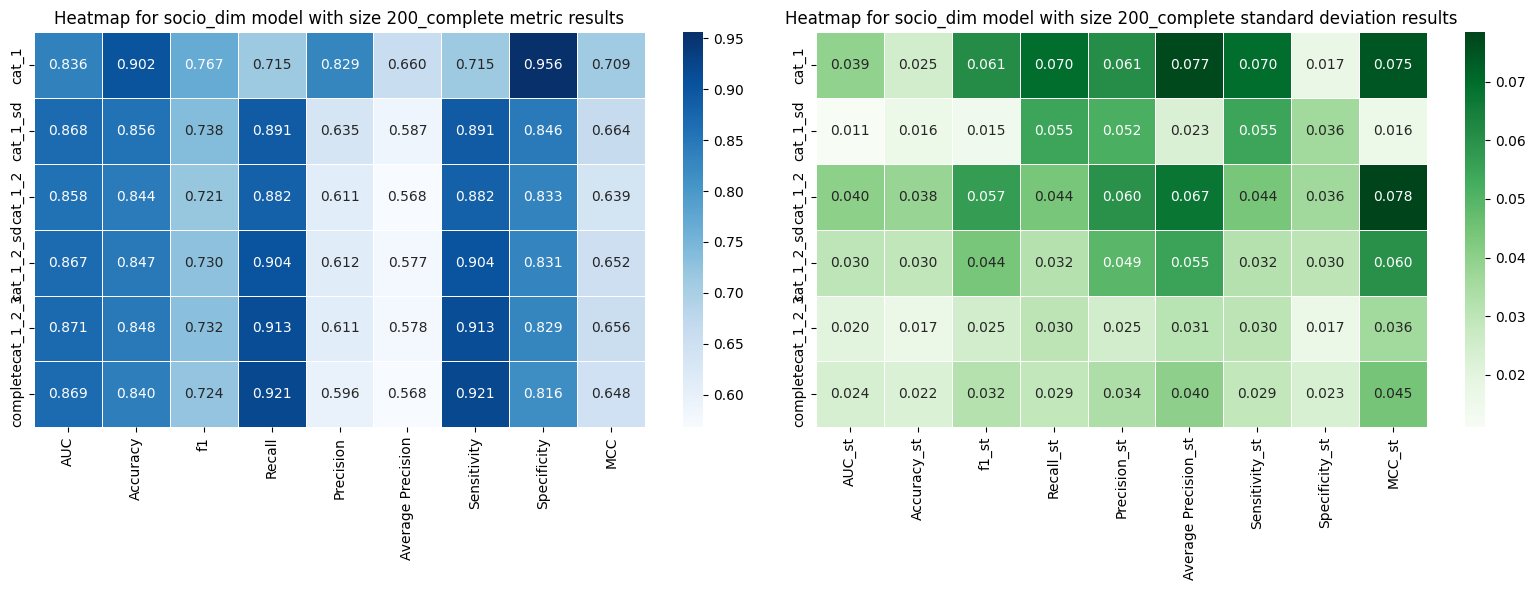

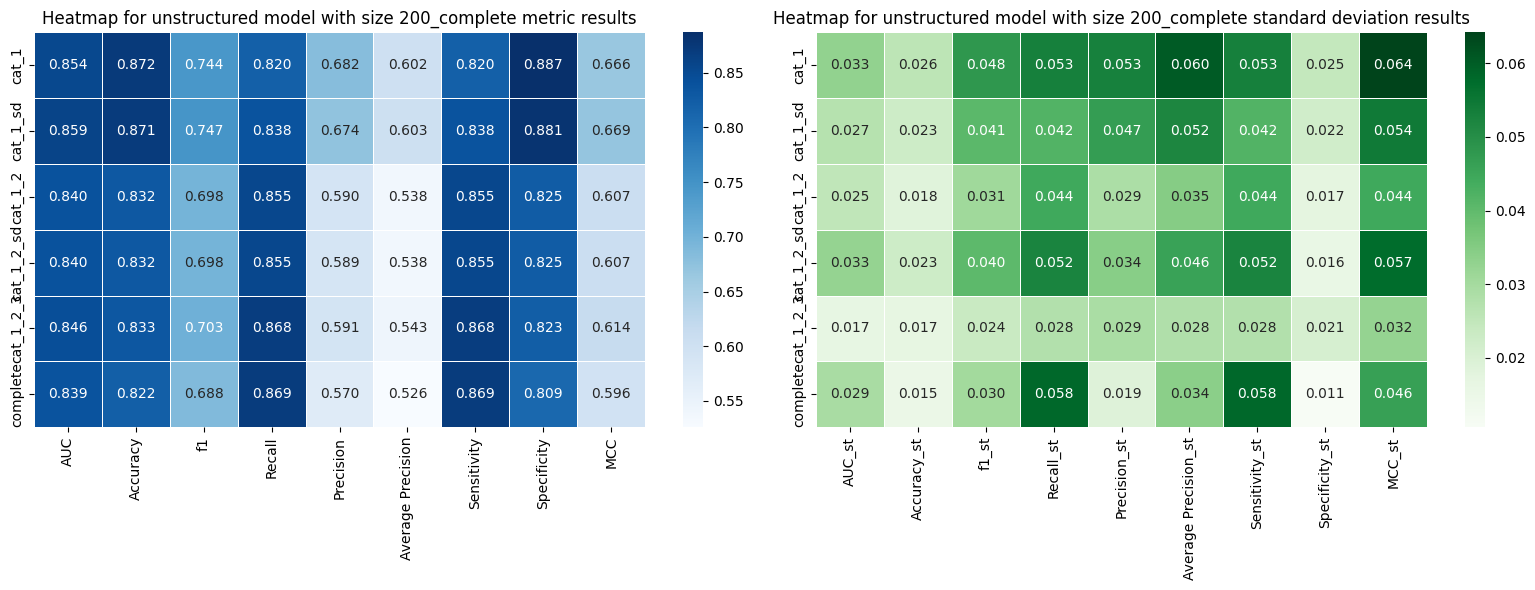

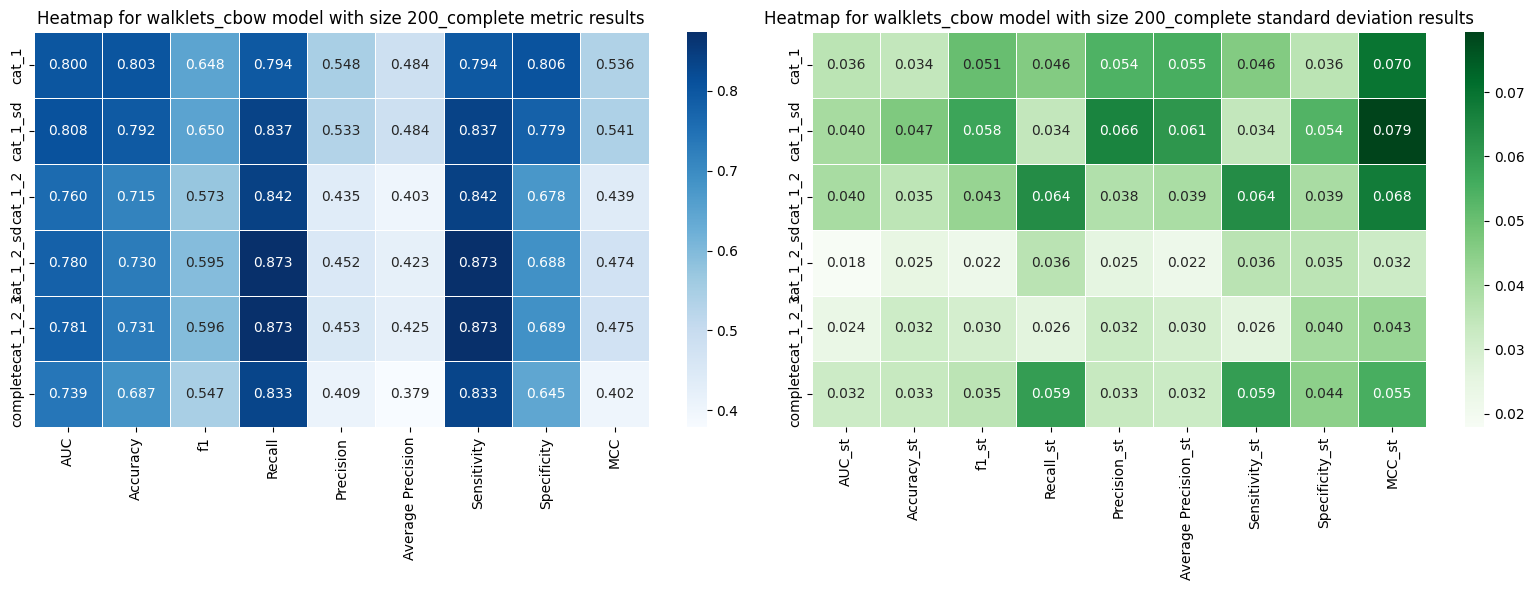

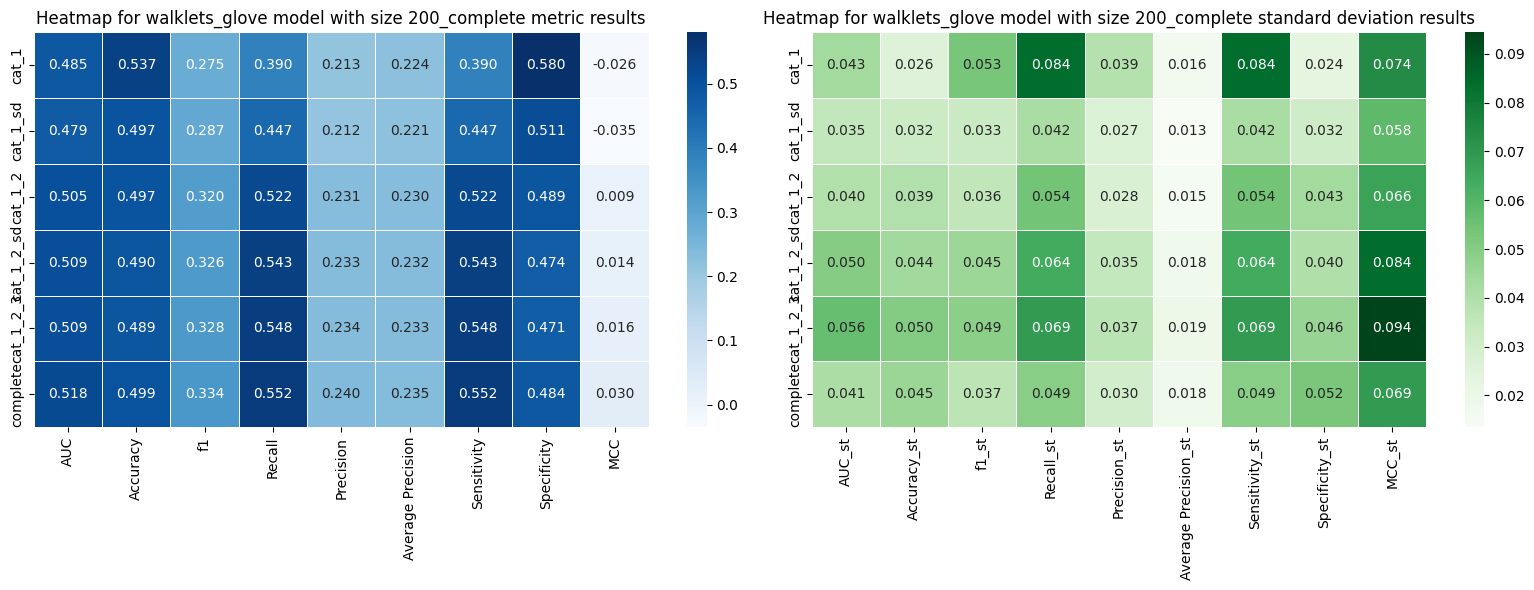

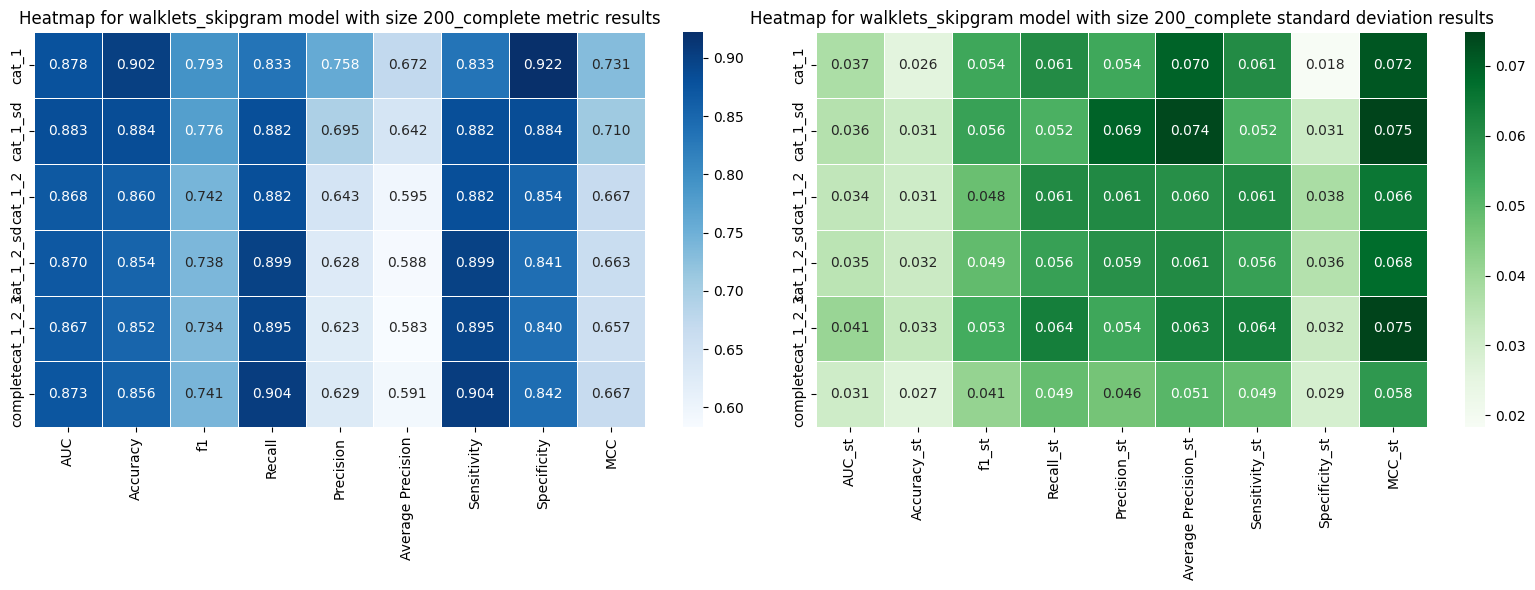

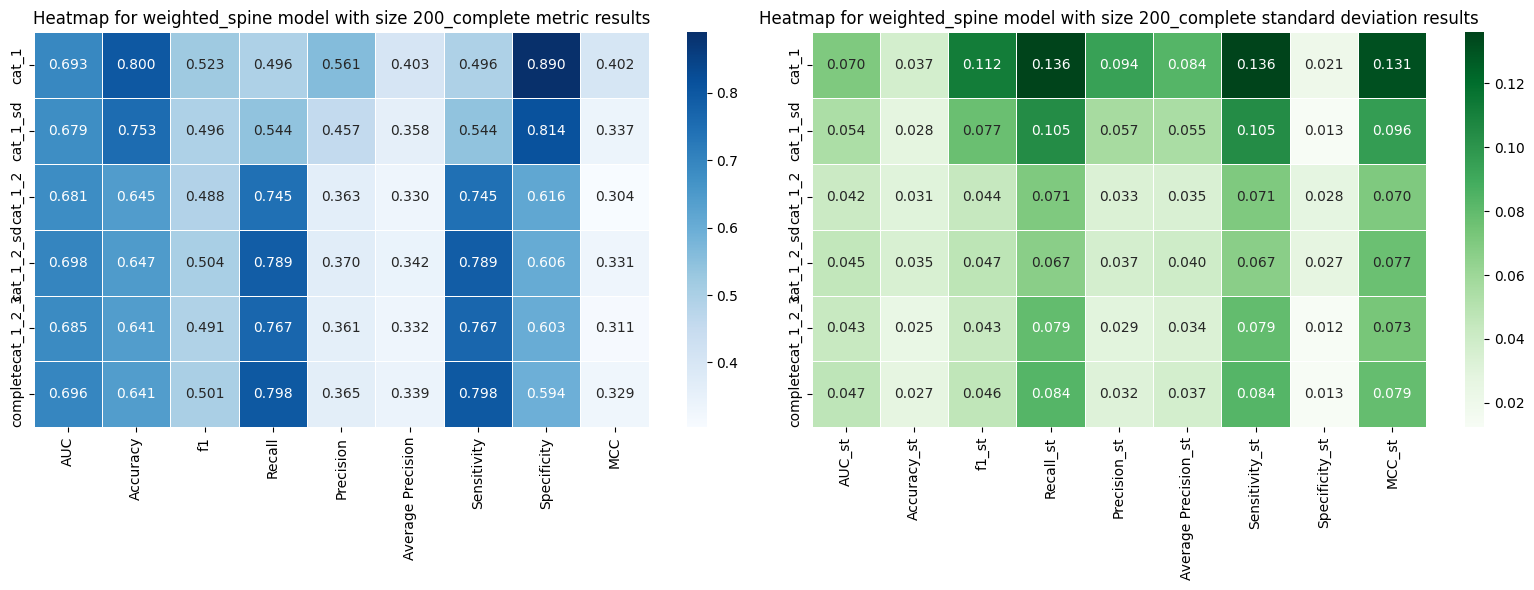

In [8]:
plot_results(lr_dict,'200_complete')


 Results for embeddings with size 200_complete 




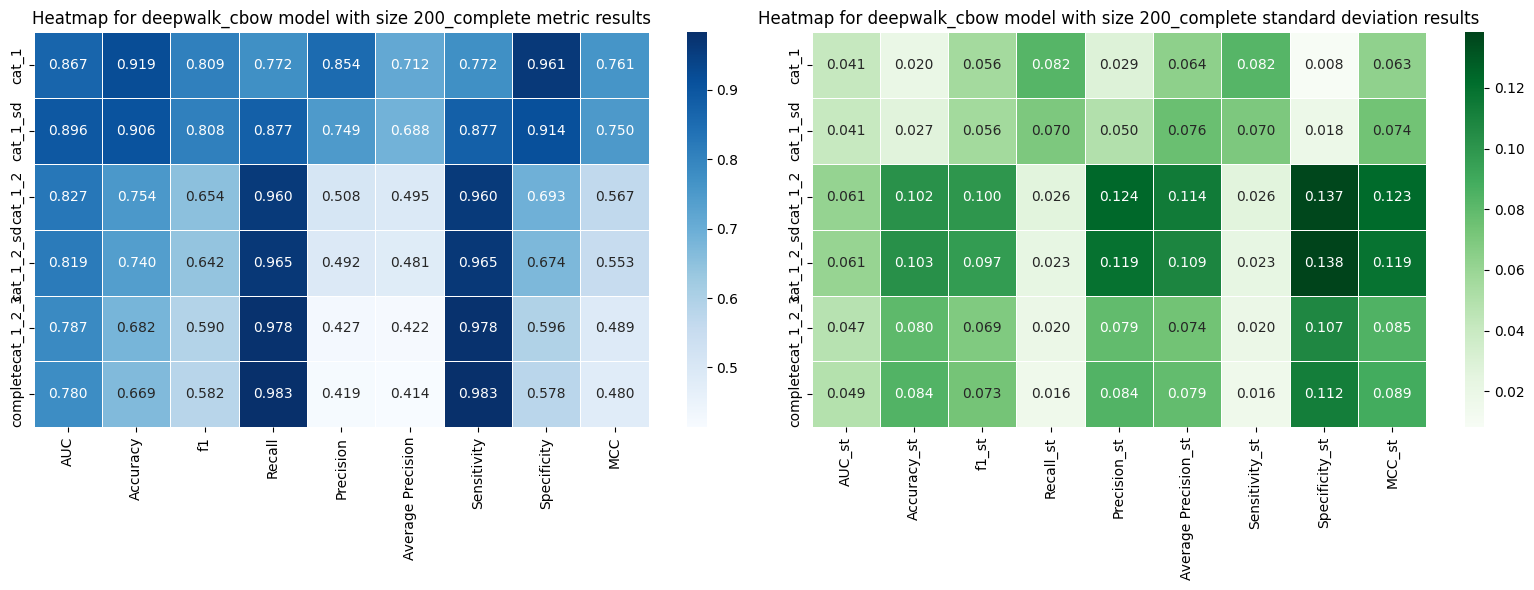

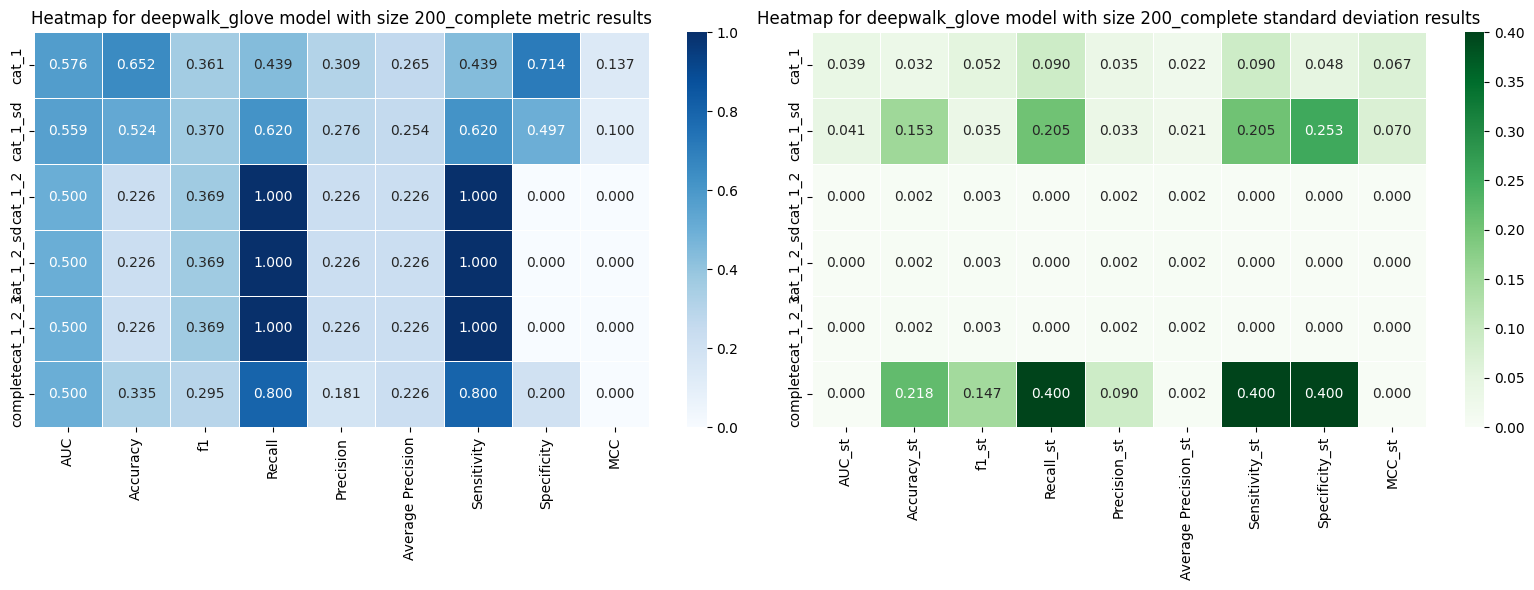

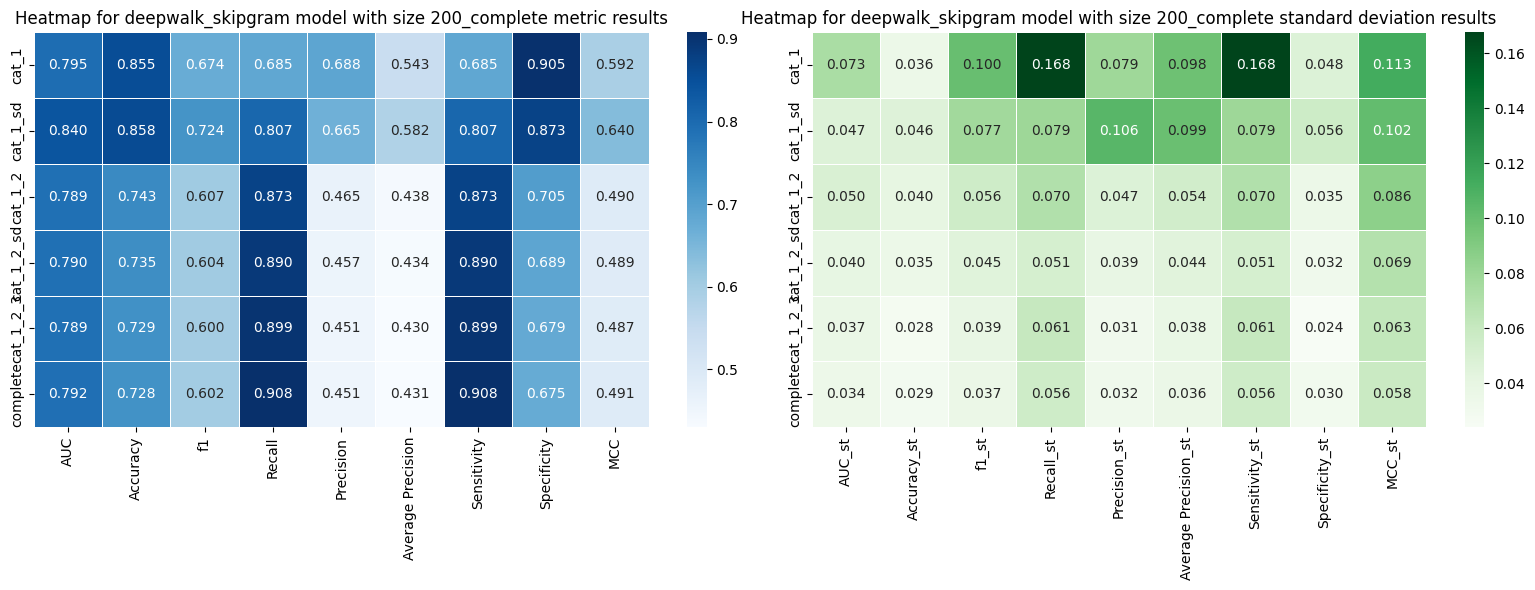

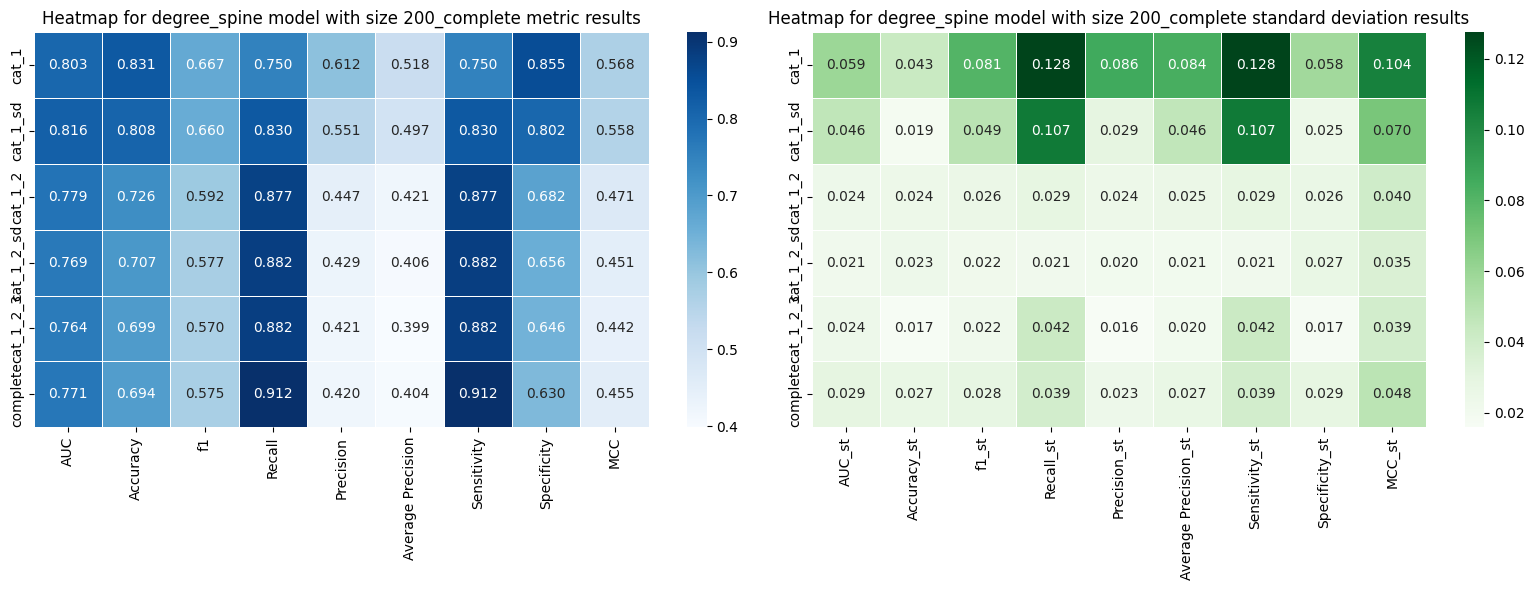

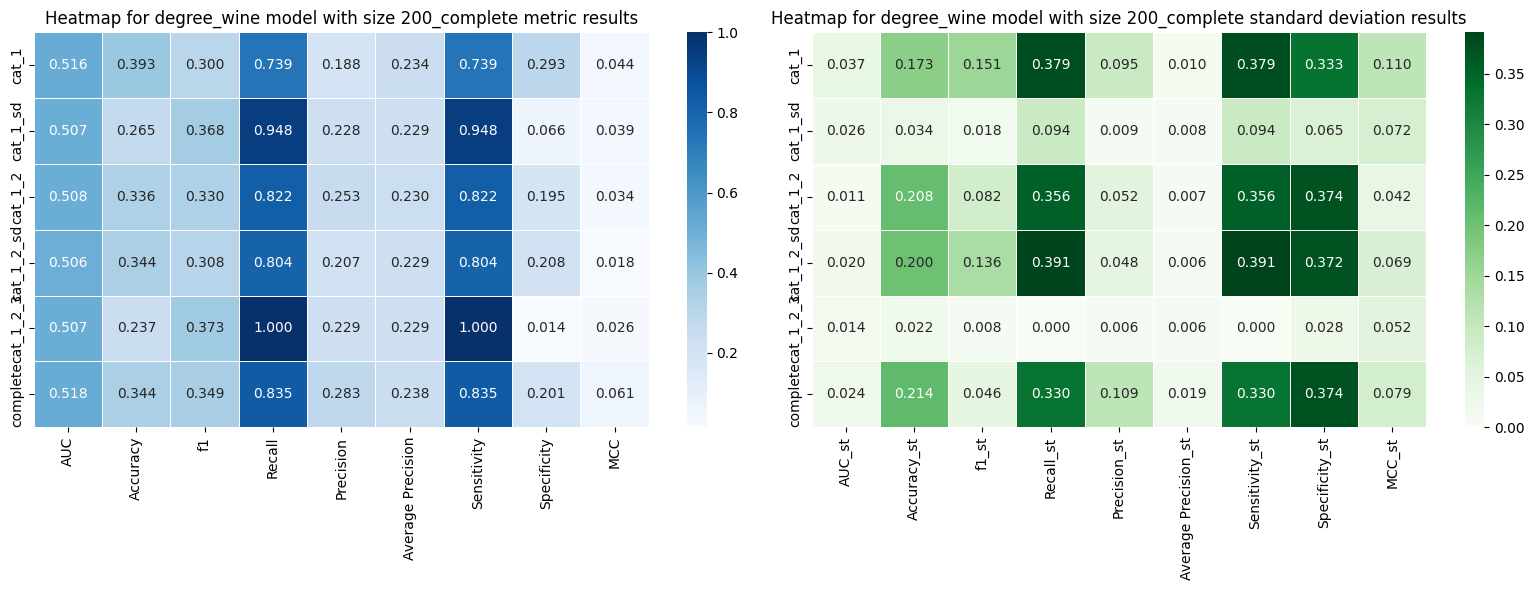

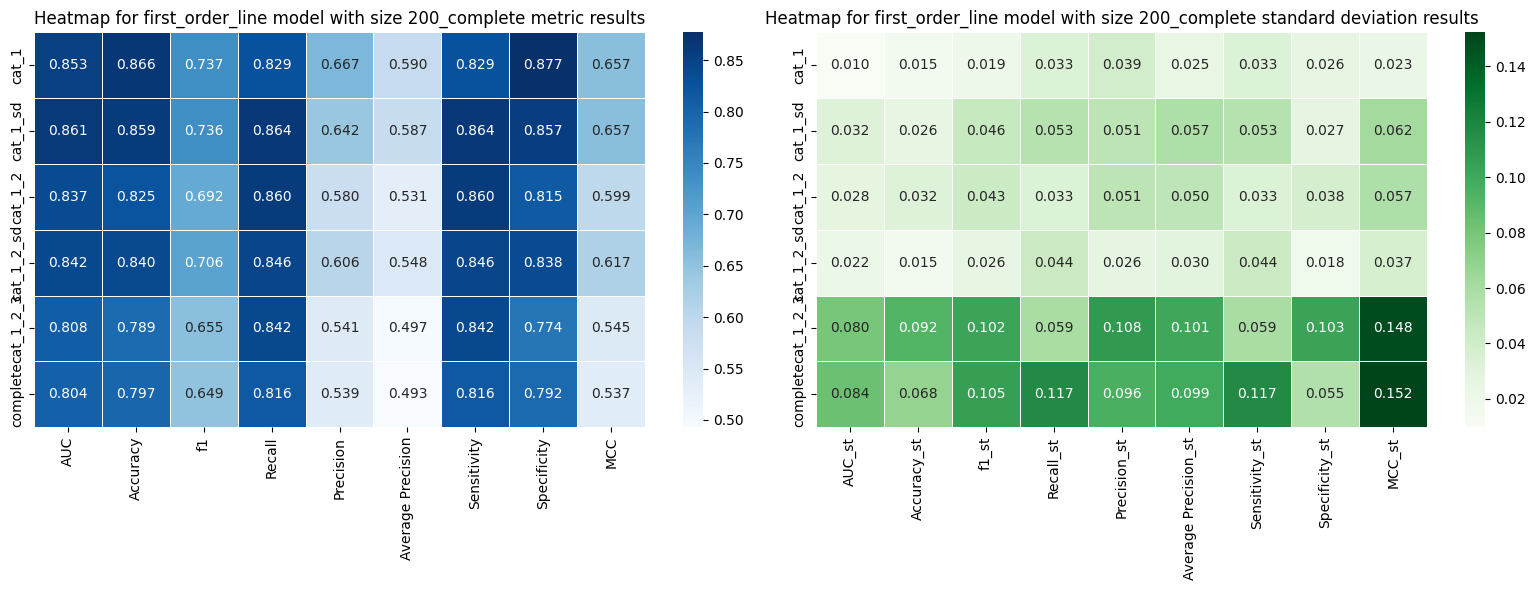

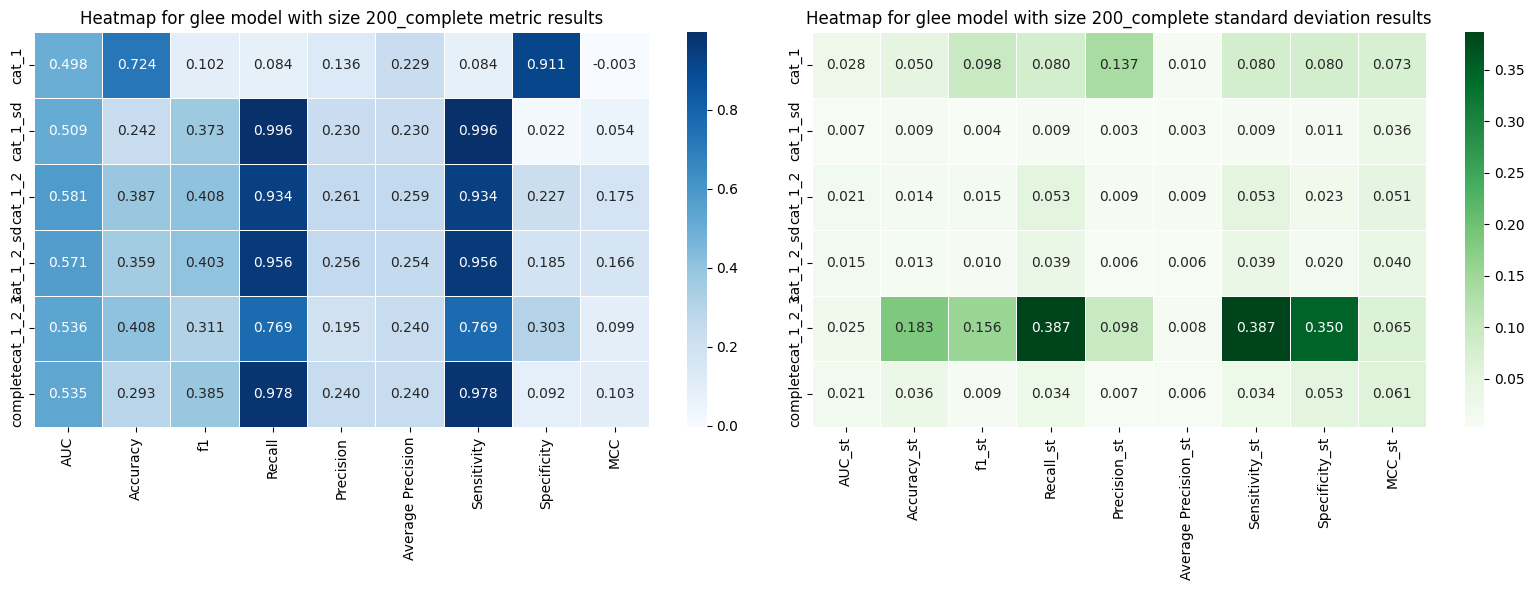

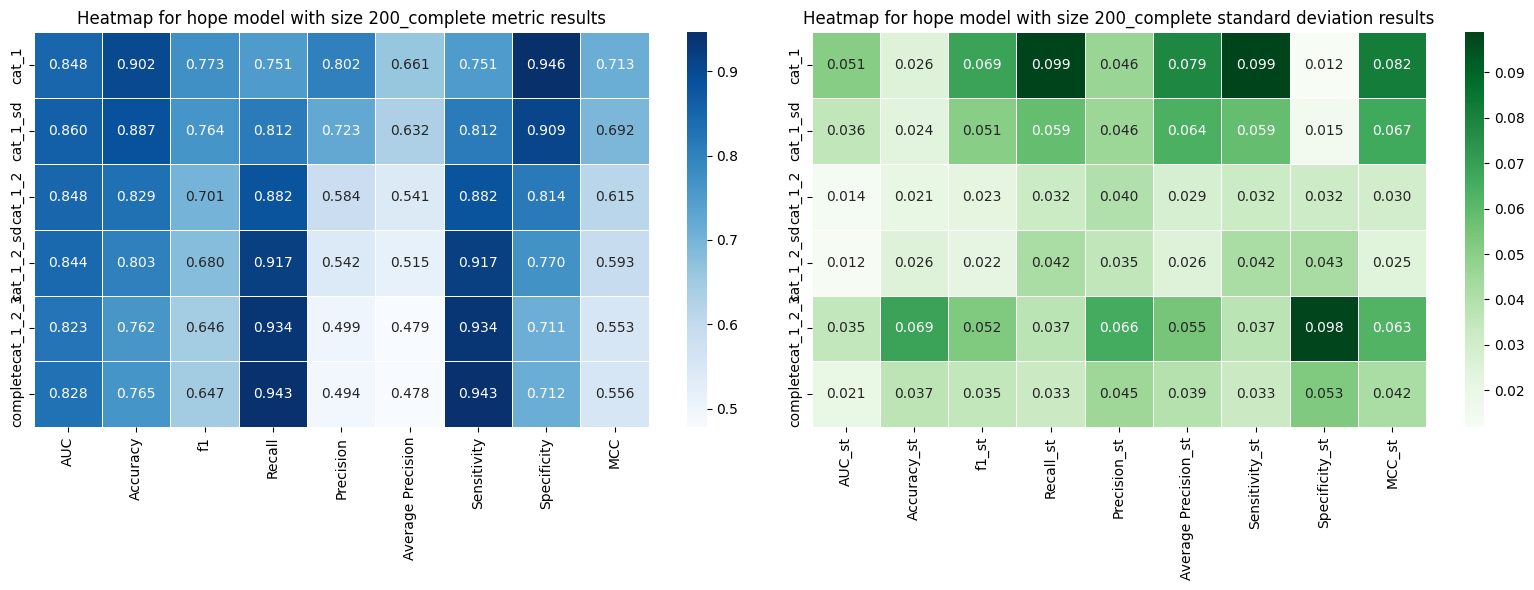

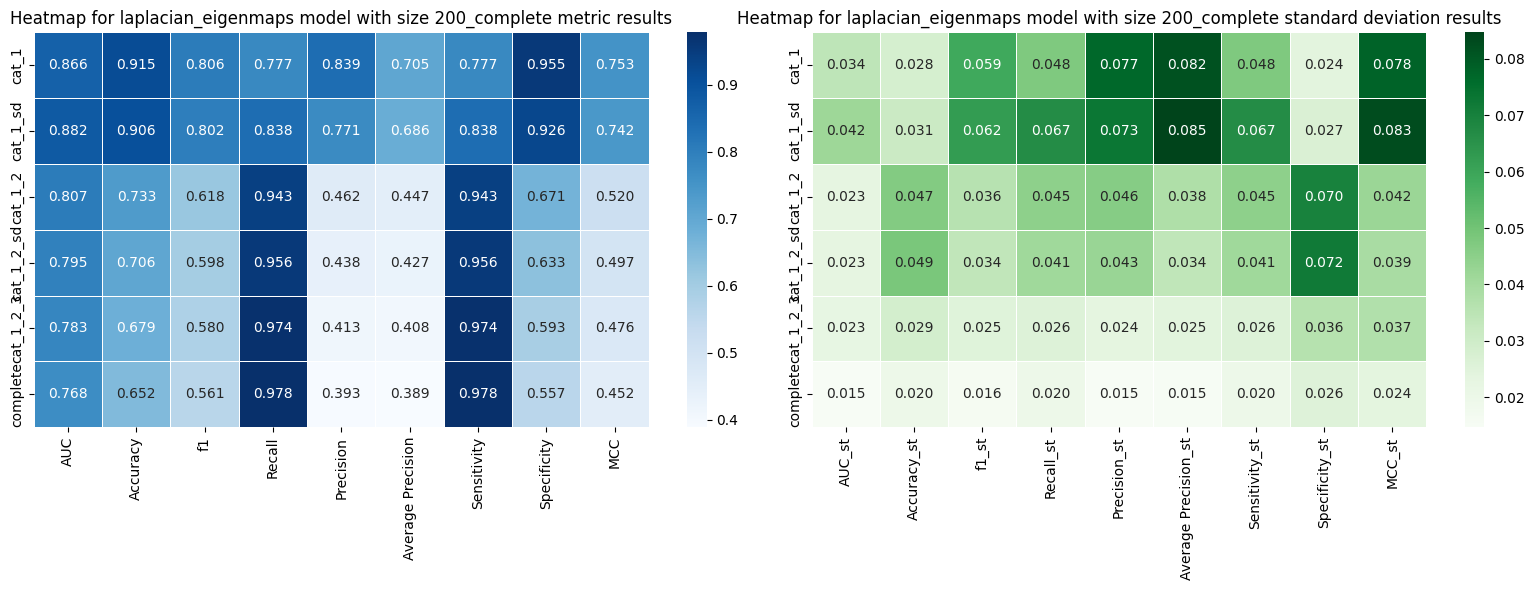

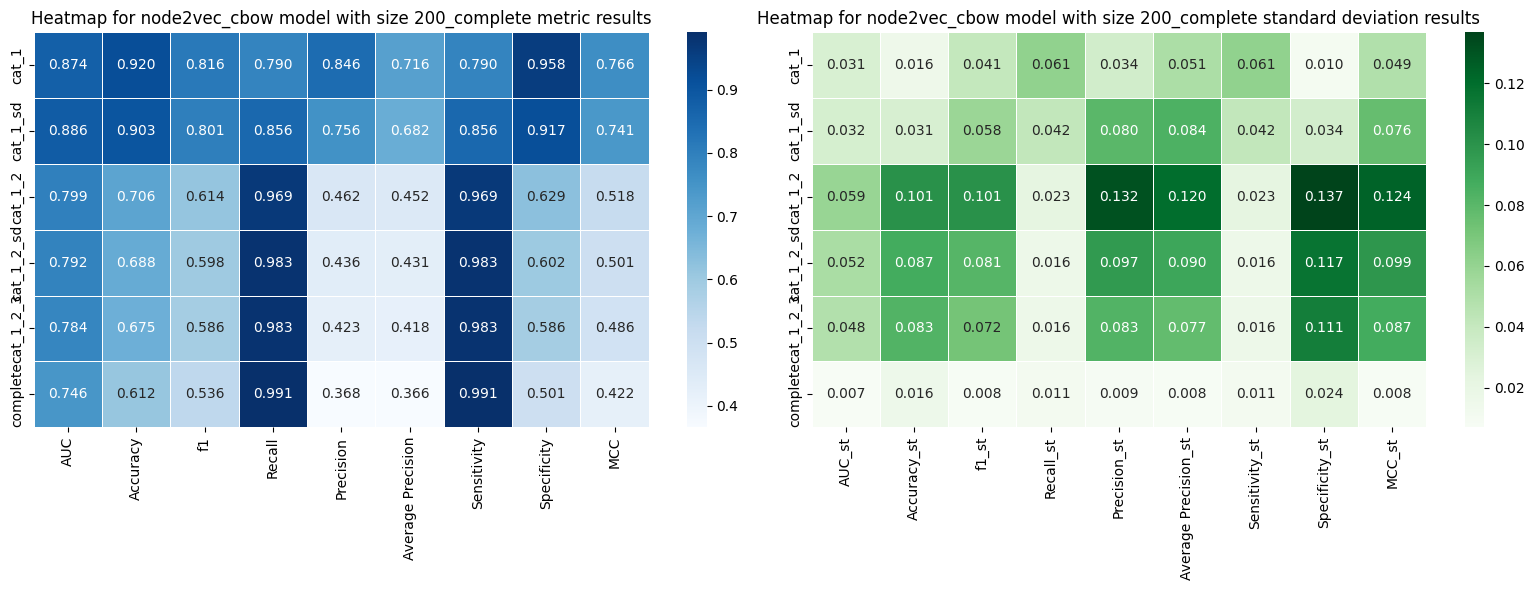

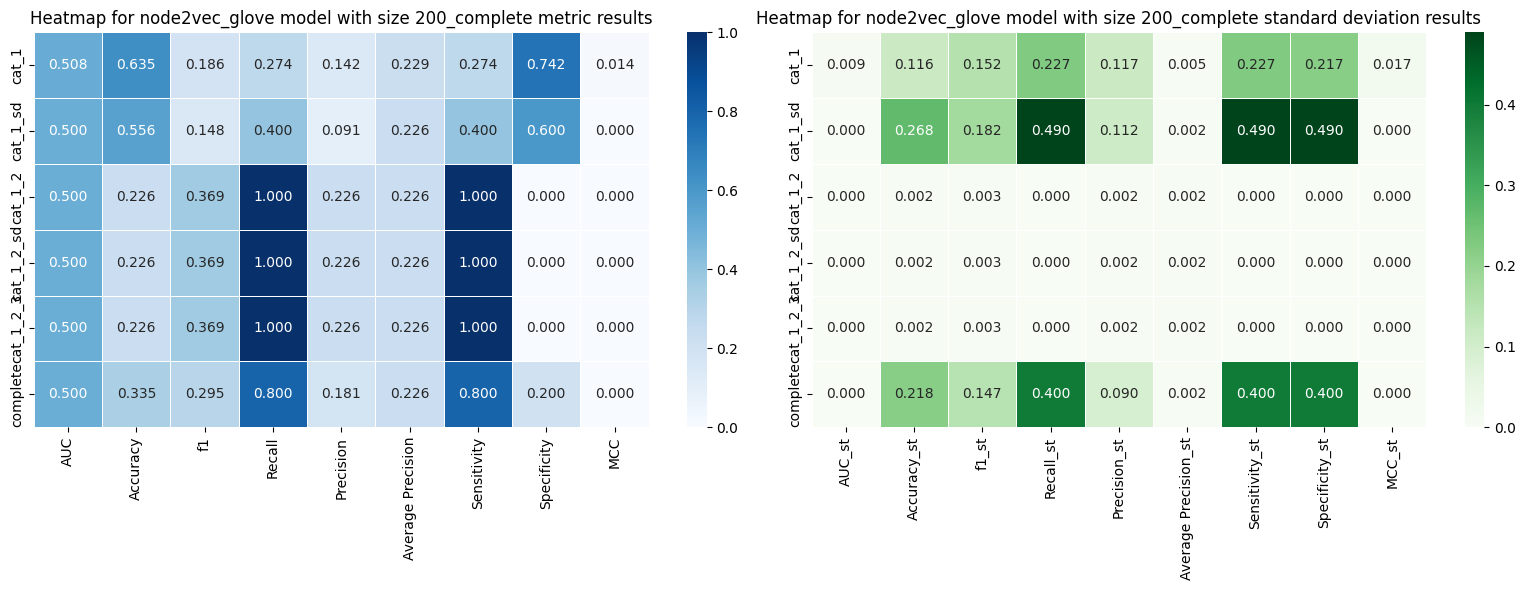

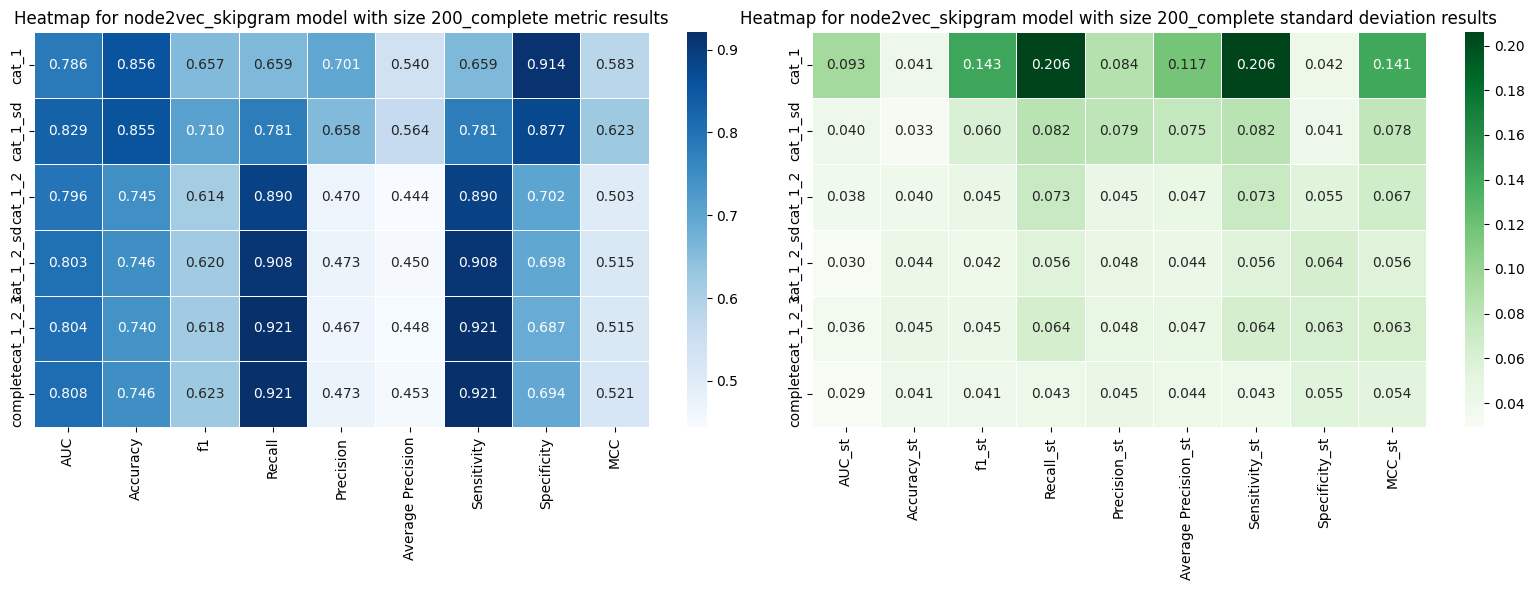

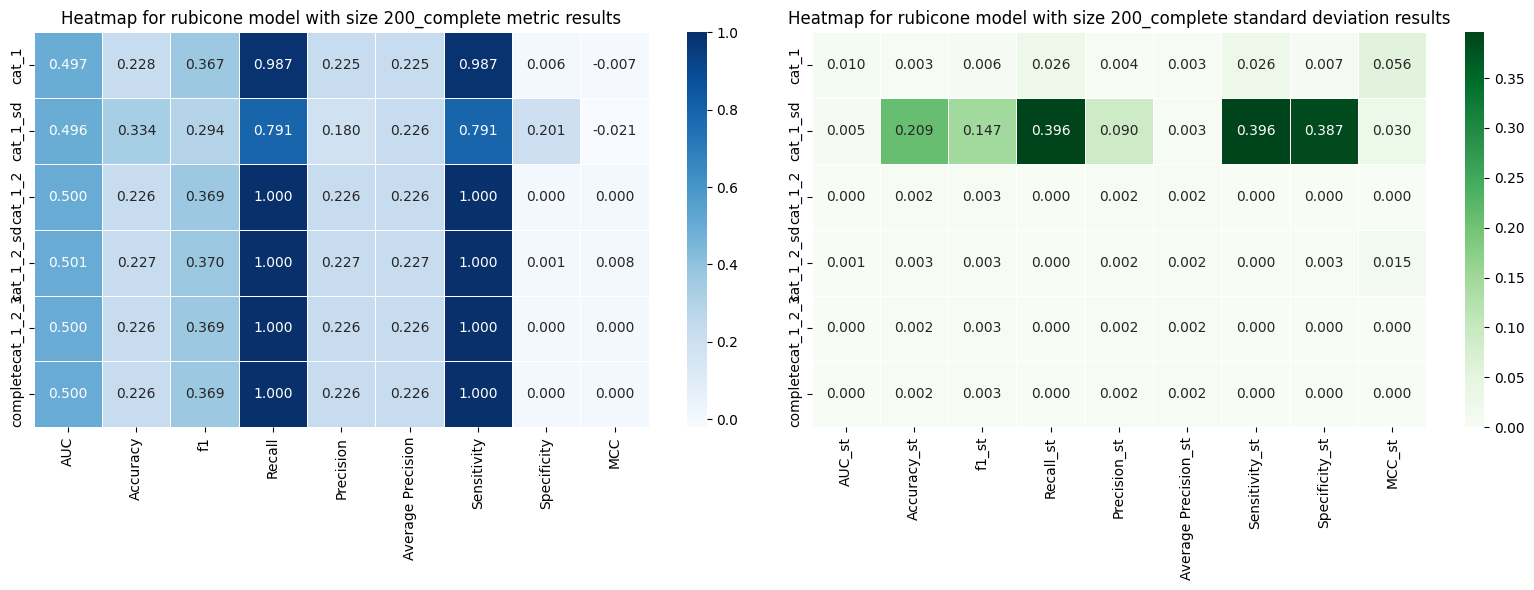

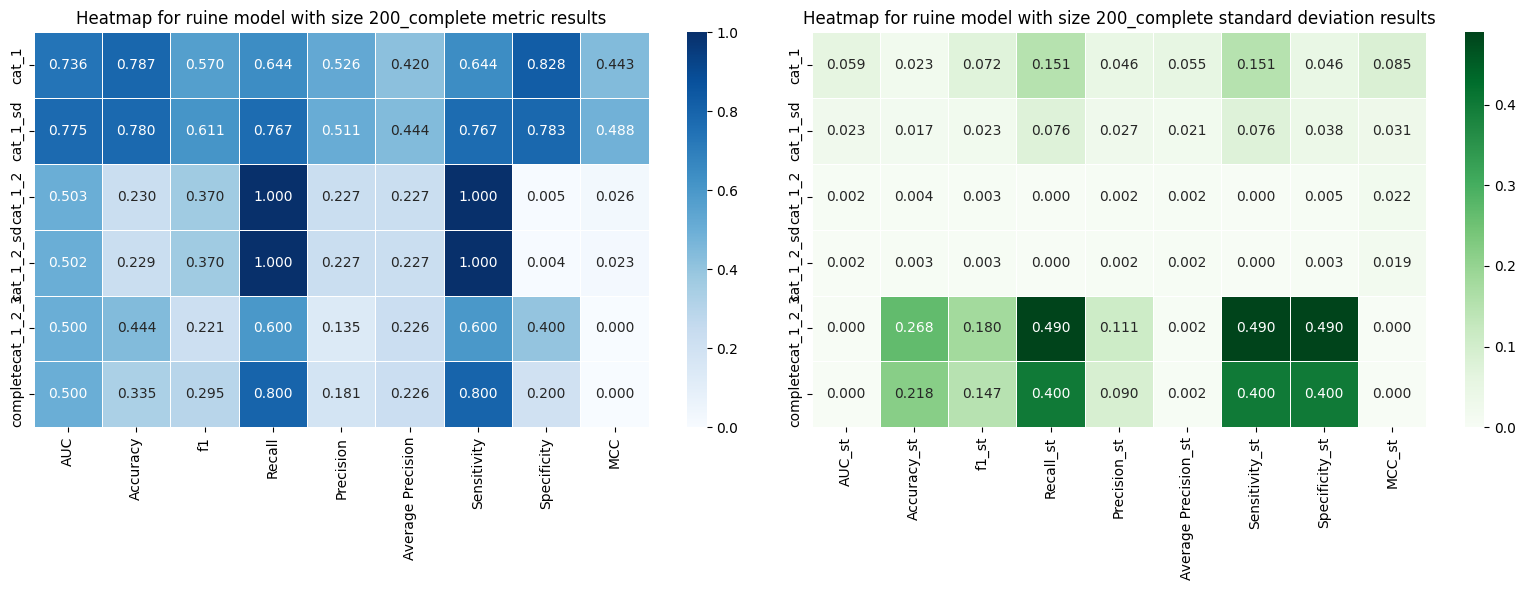

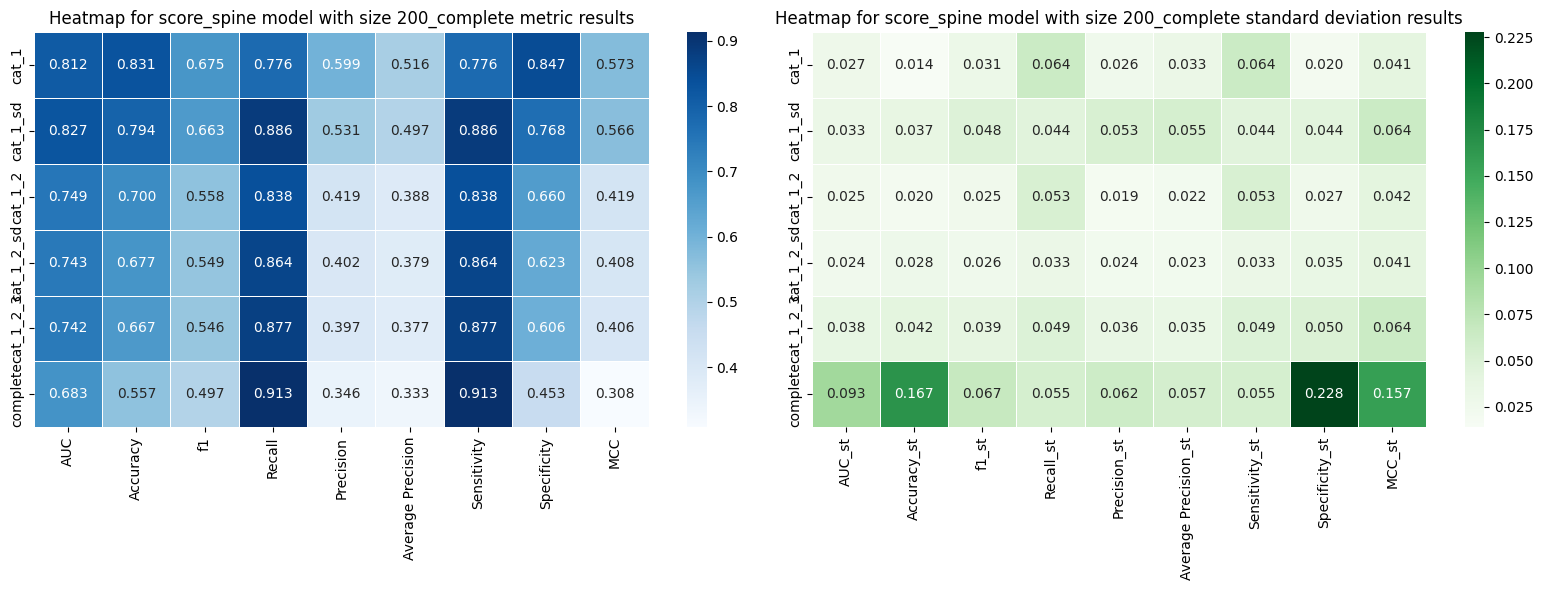

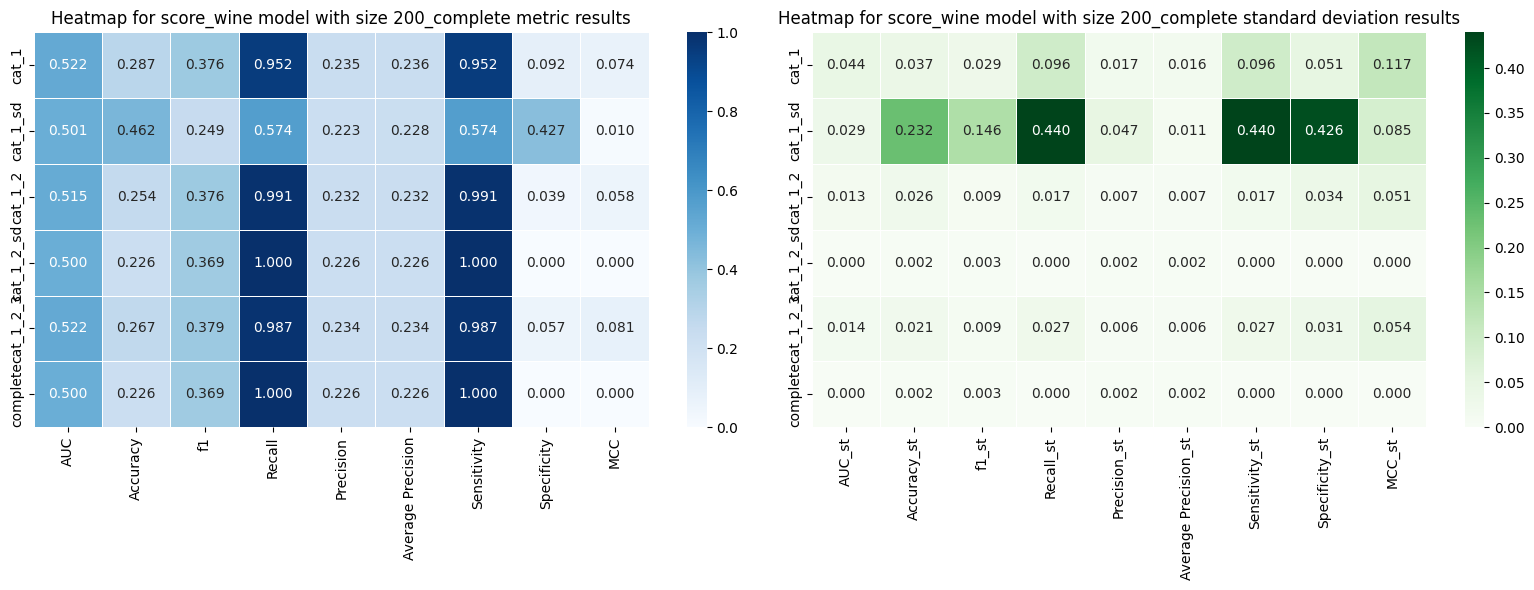

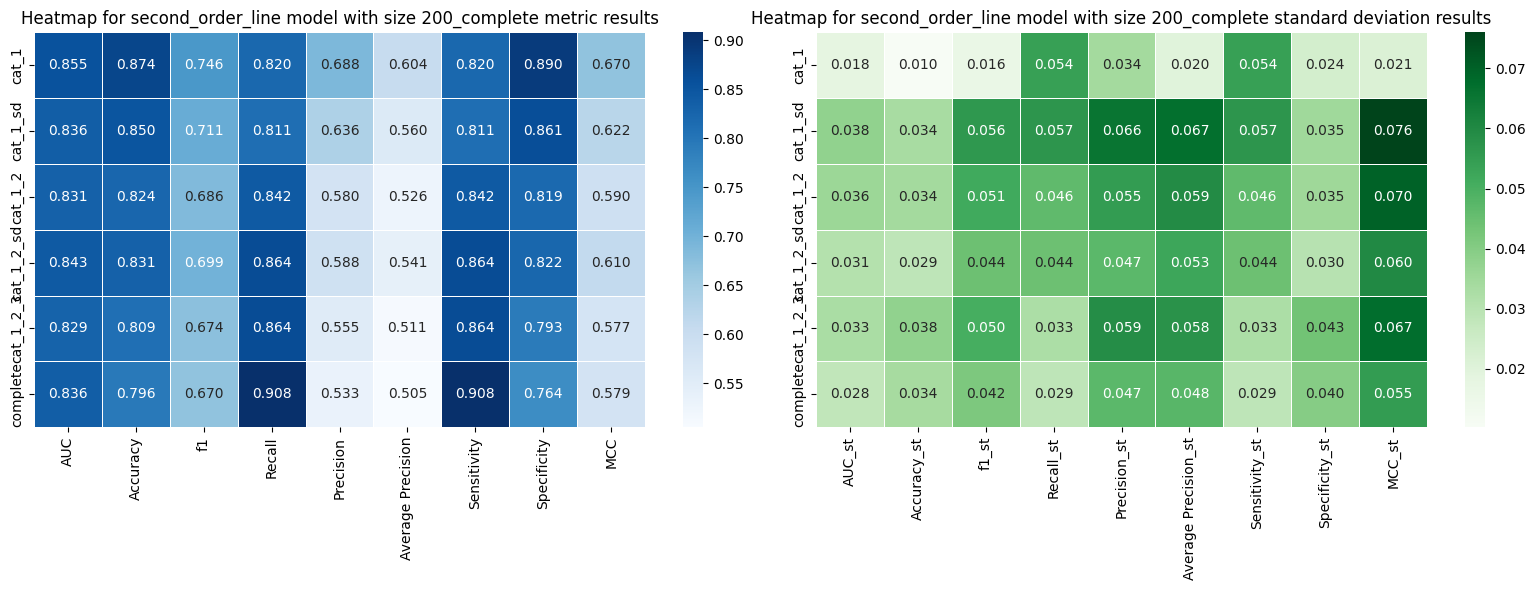

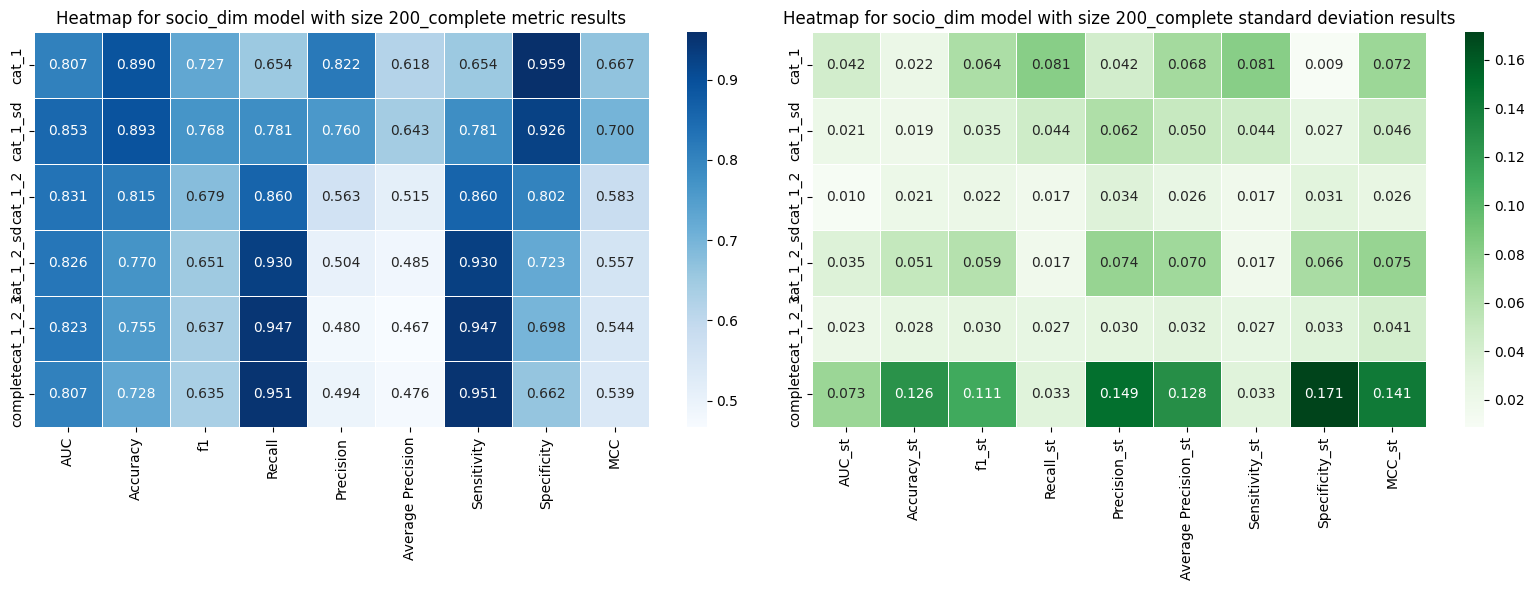

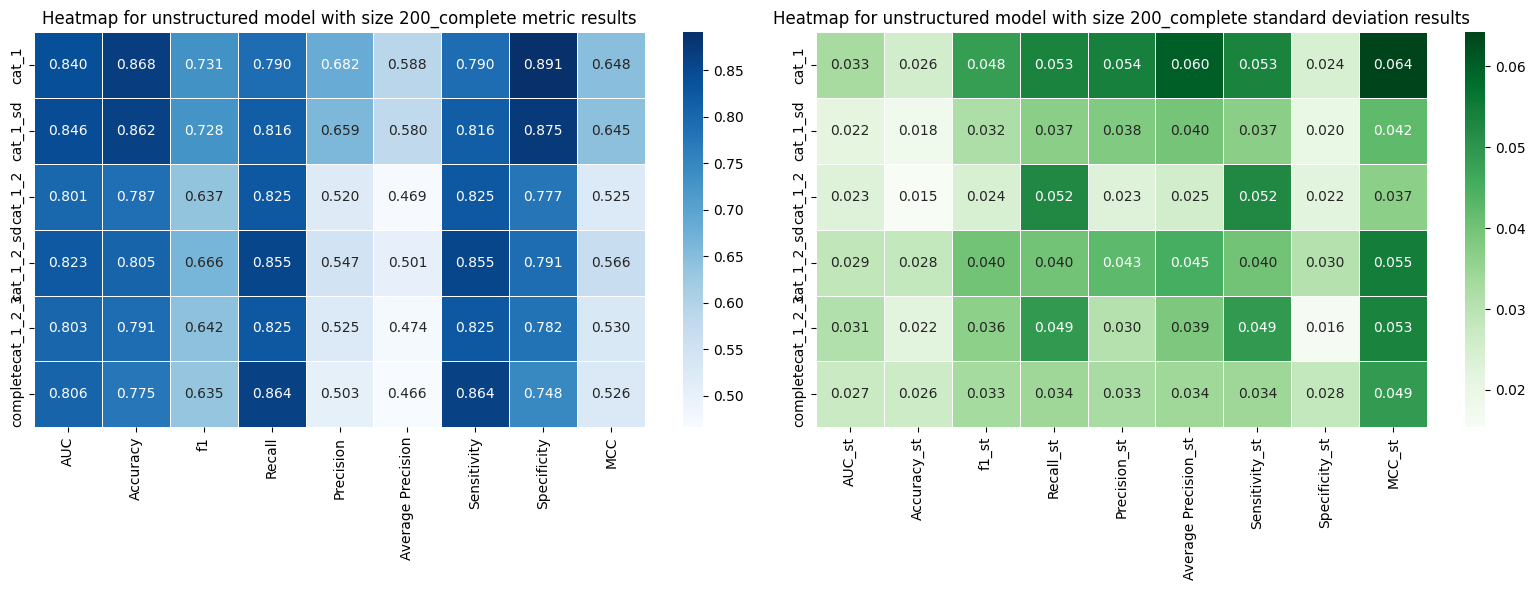

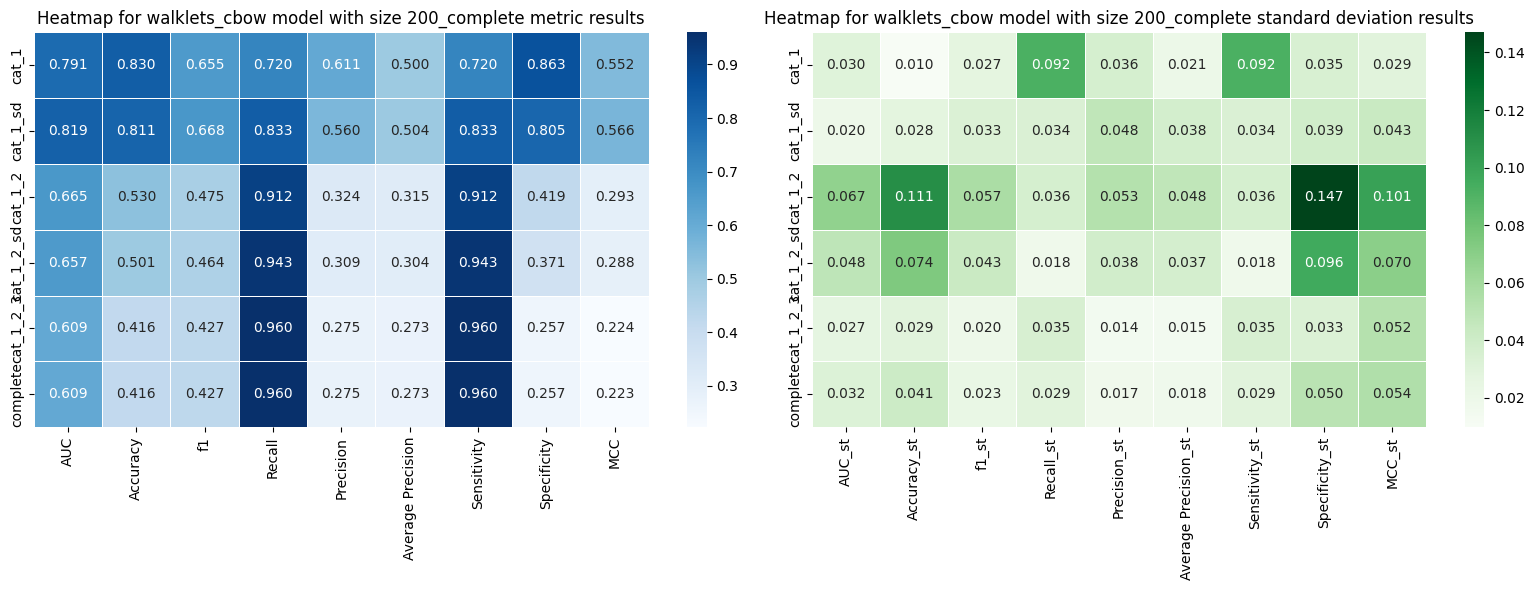

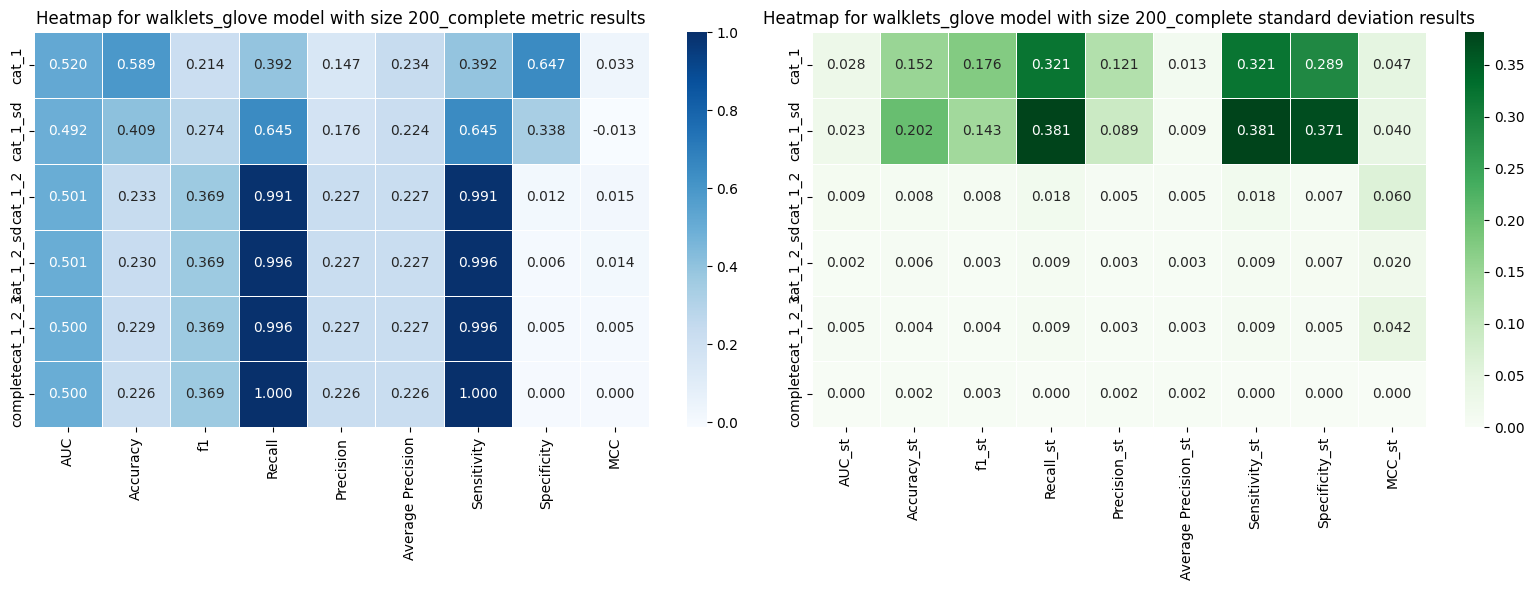

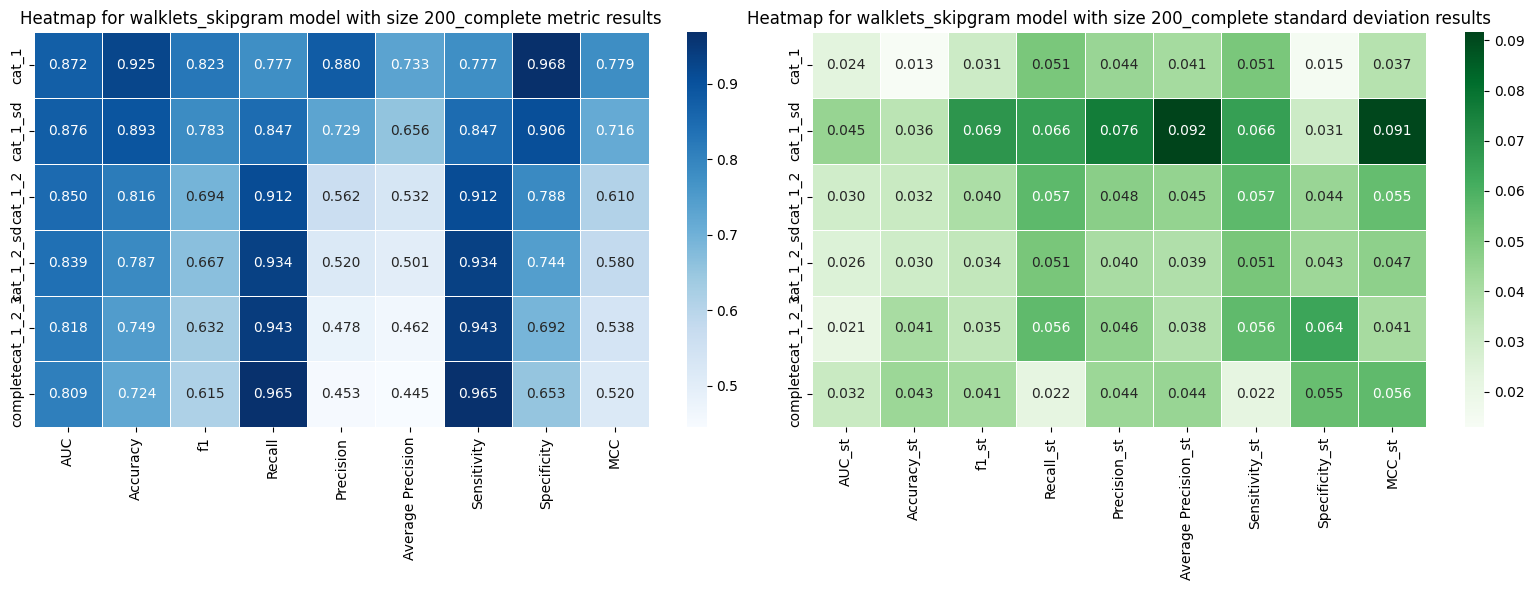

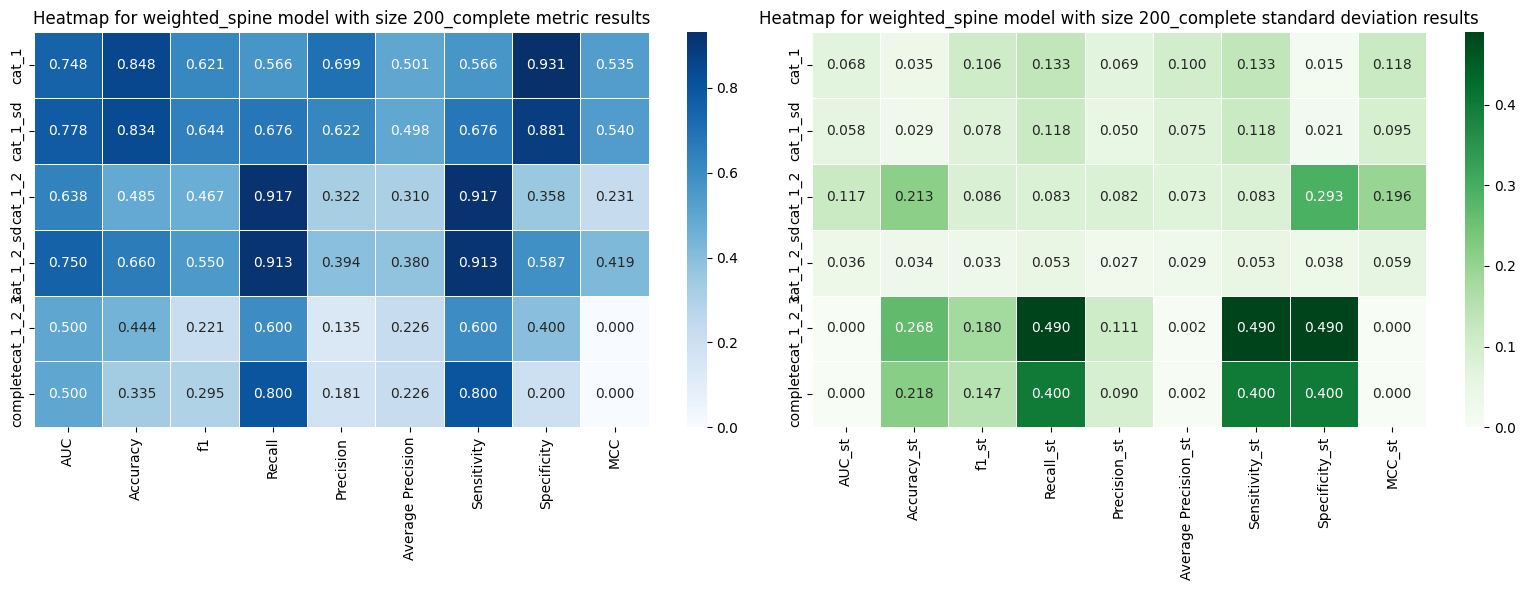

In [8]:
plot_results(svm_dict,'200_complete')

In [3]:
import pandas as pd

df = pd.read_csv('complete.csv.gz', compression='gzip')
positive = df[df['y']==1]
negative = df[df['y']==0]

print(f'{len(positive)} positive samples')
print(f'{len(negative)} negative samples')
df

1136 positive samples
779 negative samples


y         0         1         2         3         4         5         6  \
0     0 -1.766544  1.120999  0.376028  2.832830  6.305070 -1.603126  4.402943   
1     0 -4.488618 -0.969124  0.315559  1.688207 -4.145423 -4.132536  6.104208   
2     0 -2.463664 -0.088685 -4.016294 -0.105038  5.423274 -5.811978  3.051259   
3     0 -0.239062 -2.147365  0.753242  3.731023 -2.619252  0.320043  1.494218   
4     0  4.580801 -5.050358 -4.897882 -4.758234 -1.605921  2.100416 -0.613454   
...  ..       ...       ...       ...       ...       ...       ...       ...   
1910  1  0.189788 -1.024537  0.160092 -2.145351 -1.446276 -1.011565 -0.412725   
1911  1 -0.411631 -0.258034 -1.482556  0.227375  0.222969 -0.329887  0.887995   
1912  1  0.126541  0.306975 -0.965127  1.864318 -0.971043 -1.395137  0.024928   
1913  1  0.616399 -0.387033  0.924099  1.479006 -0.510102 -2.114288  1.005706   
1914  1 -0.663759 -1.053521  0.619613  0.624276 -1.031532 -0.971955  0.217955   

             7         8  ...       493       494       495       496  \
0     6.090108 -0.976433  ...  2.285072  1.387413  3.348525 -1.346200   
1     4.014224 -0.413371  ...  0.104860 -1.544338 -1.760924  2.245067   
2     0.308635  0.704476  ... -3.893750 -1.370141 -0.025877  2.583225   
3     4.542484 -2.397533  ...  4.289429  0.184189 -0.367326  1.432969   
4     2.895446  0.797766  ... -2.473954  5.142039 -3.861546  0.690610   
...        ...       ...  ...       ...       ...       ...       ...   
1910  0.147855 -1.205838  ... -1.060379  0.339757 -0.270814  1.198511   
1911  0.463928 -0.488172  ... -0.597348 -1.805617 -0.716810  0.950866   
1912 -0.614349  0.524322  ...  1.149213  0.701054  0.345597  0.361170   
1913 -1.245979 -1.166038  ... -0.459975  0.559949 -0.156024  0.600654   
1914  0.441335 -1.187290  ... -0.516564  0.833502 -0.116962  1.523781   

           497       498       499       syb     ensb_gene_id     ensb_prot_id  
0     0.097135  1.041789  0.388766   SLC45A2  ENSG00000164175  ENSP00000296589  
1     1.944858  0.079868 -1.890635     TCOF1  ENSG00000070814  ENSP00000493815  
2    -4.998294  0.713172 -1.349905      TMC6  ENSG00000141524  ENSP00000465261  
3    -0.907756 -3.258938 -4.590561       FAH  ENSG00000103876  ENSP00000453347  
4     0.214327 -1.884337 -0.298569    MAP3K1  ENSG00000095015  ENSP00000382423  
...        ...       ...       ...       ...              ...              ...  
1910  0.438888  0.212310  0.071095    RHOXF1  ENSG00000101883  ENSP00000217999  
1911 -0.049086  0.059379  0.266868    FAM47A  ENSG00000185448  ENSP00000345029  
1912  1.249271  0.934101  0.477965     SLFN5  ENSG00000166750  ENSP00000299977  
1913  1.236304 -0.482205  0.044400  KIAA1586  ENSG00000168116  ENSP00000359768  
1914  0.158521  0.869596 -0.707052    PCDHA5  ENSG00000204965  ENSP00000436557  

[1915 rows x 504 columns]